In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import joypy
import numpy as np
from plot_results import *

## DAT results

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


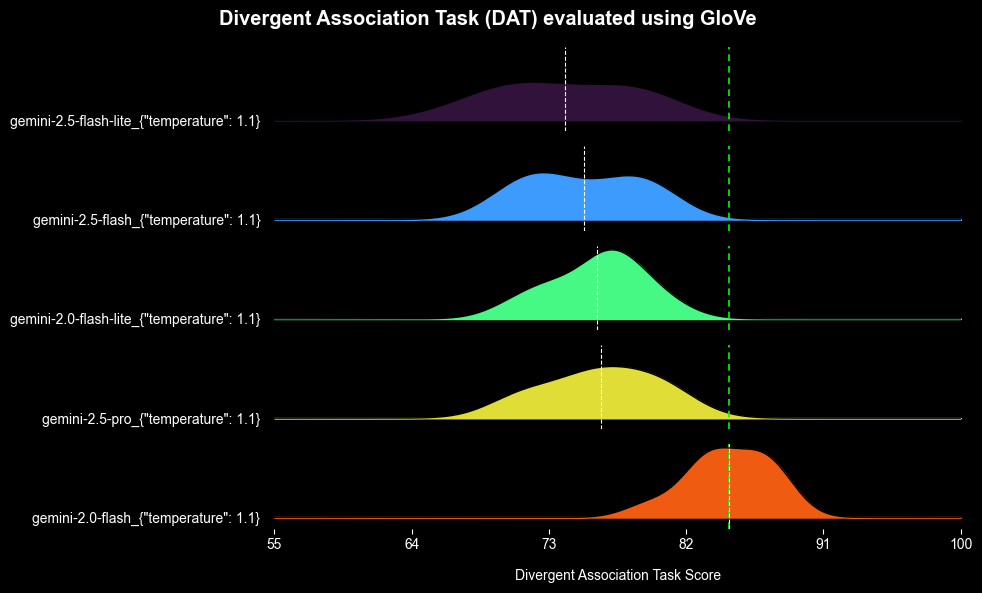

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 1.1}'): 84.78


In [ ]:
plot_distribution_results('./results/DAT_1.0_classic_DAT_unnormalized_results.json',
                          dark_mode=True,
                          embedding_model=['GloVe'],
                          plot_title="Divergent Association Task (DAT) evaluated using GloVe",
                          x_axis_title="Divergent Association Task Score",
                          show_benchmark=True,
                          ascending=True,
                          x_min=55, 
                          x_max=100,
                          save_file=False, 
                          file_name="DAT_1.0_classic_DAT_as_paper.png",
)

In [3]:
import pprint

data_file = './results/DAT_1.2_robust_DAT_diffTemp_diffPrompts_unnormalized_results.json'
dark_mode=True
embedding_models=['GloVe', 'BERT_WordEmbeddings_L6']
plot_title="DAT of gemini models evaluated using embedding ensamble"
x_axis_title="DAT Score"
show_benchmark=True
ascending=True
x_min=35
x_max=80
save_file=True
file_name="DAT_1.2_robust_DAT_diffTemp_diffPrompt.png"

model_colors = {
    'gemini-2.5-pro':       '#D8D840',  # yellow
    'gemini-2.5-flash':     '#3088F8',  # blue
    'gemini-2.5-flash-lite':'#281030',  # deep purple
    'gemini-2.0-flash':     '#F05020',  # orange
    'gemini-2.0-flash-lite':'#28F880',  # green
}
    
# 1) Load & flatten JSON into a pandas DataFrame
try:
    with open(data_file, "r") as f:
        raw = json.load(f)
except json.JSONDecodeError as e:
    raise ValueError(f"Invalid JSON syntax in {data_file}: {e}") from None
except FileNotFoundError as e:
    raise FileNotFoundError(f"File {data_file} was not found!") from None

records = []
for model, cfg in raw.items():
    avg_models = []
    for emb_model, value in cfg.items():
        if emb_model in embedding_models:
            if emb_model == 'config':
                continue
            model_val = []
            for s in value:
                model_val.append(s)
            avg_models.append(model_val)
    # pprint.pprint(avg_models)
    # print()
    avg = [sum(x)/len(x) for x in zip(*avg_models)]
    # print(avg)
    # print()
    
    model_name = model.split("_")[0]
    model_config = model.split("_")[1]
    for score in avg:
        records.append((model_name, model_config, score))

df = pd.DataFrame(records, columns=['model', 'model_config', 'score'])

# 3) Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values(ascending=ascending)
    .index
    .tolist()
)
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)


/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


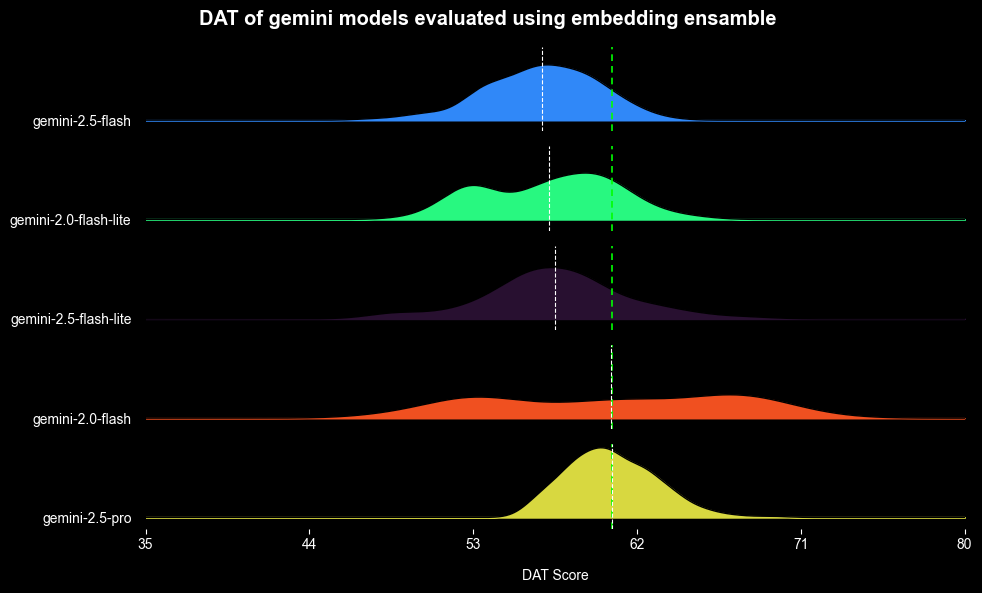

Benchmark (mean of top model 'gemini-2.5-pro'): 60.61


In [ ]:
# 2) Matplotlib style
base_style = {
    "text.usetex": False,
    "mathtext.fontset": "cm",
}
theme_style = {
    "font.family": "Arial",
    "figure.facecolor": "black" if dark_mode else "white",
    "axes.facecolor": "black" if dark_mode else "white",
    "savefig.facecolor": "black" if dark_mode else "white",
    "text.color": "white" if dark_mode else "black",
    "xtick.color": "white" if dark_mode else "black",
    "ytick.color": "white" if dark_mode else "black",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white" if dark_mode else "black"

# 4) Compute mean scores & benchmark
mean_map = df.groupby("model", observed=False)["score"].mean()
benchmark_line = mean_map.max()
top_model = mean_map.idxmax()

# 5) Ridge‑plot (joypy)
fig, axes = joypy.joyplot(
    data=df,
    by="model",
    column="score",
    figsize=(10, len(order) * 1.2),
    overlap=1,
    linewidth=1,
    color=[model_colors.get(m, 'gray') for m in order],
    legend=False,
    x_range=[x_min, x_max],
)

fig.suptitle(
    plot_title,
    color=fg_color,
    fontsize="x-large",
    fontweight="bold",
)

# 6) Vertical reference lines
for ax, mdl in zip(axes, order):
    if show_benchmark:
        ax.axvline(
            benchmark_line,
            ls="--", lw=1.2, color="lime",
            dashes=(4, 3), zorder=100,
        )
    # per‑model mean
    ax.axvline(
        mean_map[mdl],
        ls="--", lw=0.8, color=fg_color, zorder=100,
    )

# 7) Shared x‑label & uniform ticks
for ax in axes:
    ax.set_xlabel("")

axes[-1].set_xlabel(
    x_axis_title,
    color=fg_color,
    fontsize="medium",
    labelpad=12,
)

ticks = np.linspace(x_min, x_max, 6)
axes[-1].set_xticks(ticks)

# 8) Finish: layout, save, show
plt.tight_layout()

# plt.savefig("./results/plots/"+file_name, dpi=300)

plt.show()

print(f"Benchmark (mean of top model '{top_model}'): {benchmark_line:.2f}")

In [7]:
df

,model,model_config,score
0,gemini-2.5-pro,"{""temperature"": 0.5}",60.206247
1,gemini-2.5-pro,"{""temperature"": 0.5}",59.228390
2,gemini-2.5-pro,"{""temperature"": 0.5}",62.272980
3,gemini-2.5-pro,"{""temperature"": 0.5}",60.043856
4,gemini-2.5-pro,"{""temperature"": 0.5}",60.624773
...,...,...,...
995,gemini-2.0-flash-lite,"{""temperature"": 2}",57.948273
996,gemini-2.0-flash-lite,"{""temperature"": 2}",60.401331
997,gemini-2.0-flash-lite,"{""temperature"": 2}",54.132122
998,gemini-2.0-flash-lite,"{""temperature"": 2}",63.915966


In [8]:
df['prompt'] = [f"Prompt {(i % 5)+1}" for i in range(len(df))]
df['temperature'] = df['model_config'].apply(lambda x: eval(x)["temperature"])

In [9]:
df

,model,model_config,score,prompt,temperature
0,gemini-2.5-pro,"{""temperature"": 0.5}",60.206247,Prompt 1,0.5
1,gemini-2.5-pro,"{""temperature"": 0.5}",59.228390,Prompt 2,0.5
2,gemini-2.5-pro,"{""temperature"": 0.5}",62.272980,Prompt 3,0.5
3,gemini-2.5-pro,"{""temperature"": 0.5}",60.043856,Prompt 4,0.5
4,gemini-2.5-pro,"{""temperature"": 0.5}",60.624773,Prompt 5,0.5
...,...,...,...,...,...
995,gemini-2.0-flash-lite,"{""temperature"": 2}",57.948273,Prompt 1,2.0
996,gemini-2.0-flash-lite,"{""temperature"": 2}",60.401331,Prompt 2,2.0
997,gemini-2.0-flash-lite,"{""temperature"": 2}",54.132122,Prompt 3,2.0
998,gemini-2.0-flash-lite,"{""temperature"": 2}",63.915966,Prompt 4,2.0


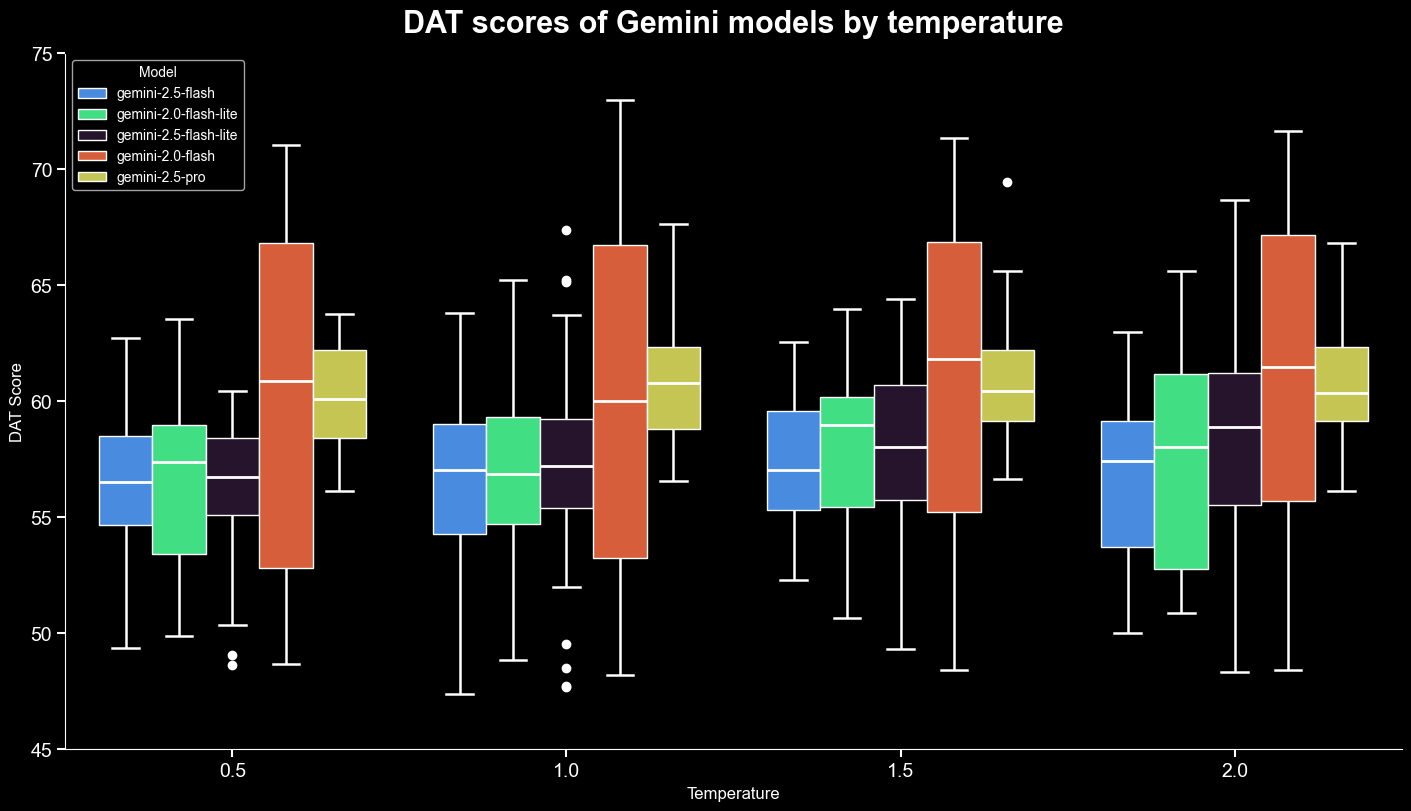

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

x_min=45
x_max=75

plt.figure(figsize=(14, 8), layout="constrained")
sns.boxplot(
    data=df,
    x='temperature',          # four temperature configs on x-axis
    y='score',                # DAT scores on y-axis
    hue='model',              # different box colors for each model
    palette=model_colors,      # your custom colors
    whiskerprops=dict(color='white', linewidth=1.8),
    capprops=dict(color='white', linewidth=1.8),
    boxprops=dict(edgecolor='white'),
    medianprops=dict(color='white', linewidth=2),
    flierprops=dict(markeredgecolor='white', markerfacecolor='white')

)

plot_title = "DAT scores of Gemini models by temperature"
plt.title(plot_title, fontsize=22, fontweight='bold', color=fg_color, pad=15)
plt.xlabel("Temperature", fontsize=12, color=fg_color)
plt.ylabel("DAT Score", fontsize=12, color=fg_color)
plt.ylim(x_min, x_max)

# Dark mode axis colors
ax = plt.gca()
ax.set_facecolor("black" if dark_mode else "white")
ax.tick_params(colors=fg_color)
plt.legend(title='Model', fontsize=10)

# Thicker spines
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1

ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

if save_file:
    plt.savefig("./results/plots/DAT_1.2_robust_boxplot_temperature.png", dpi=300, facecolor=plt.gcf().get_facecolor())

plt.show()


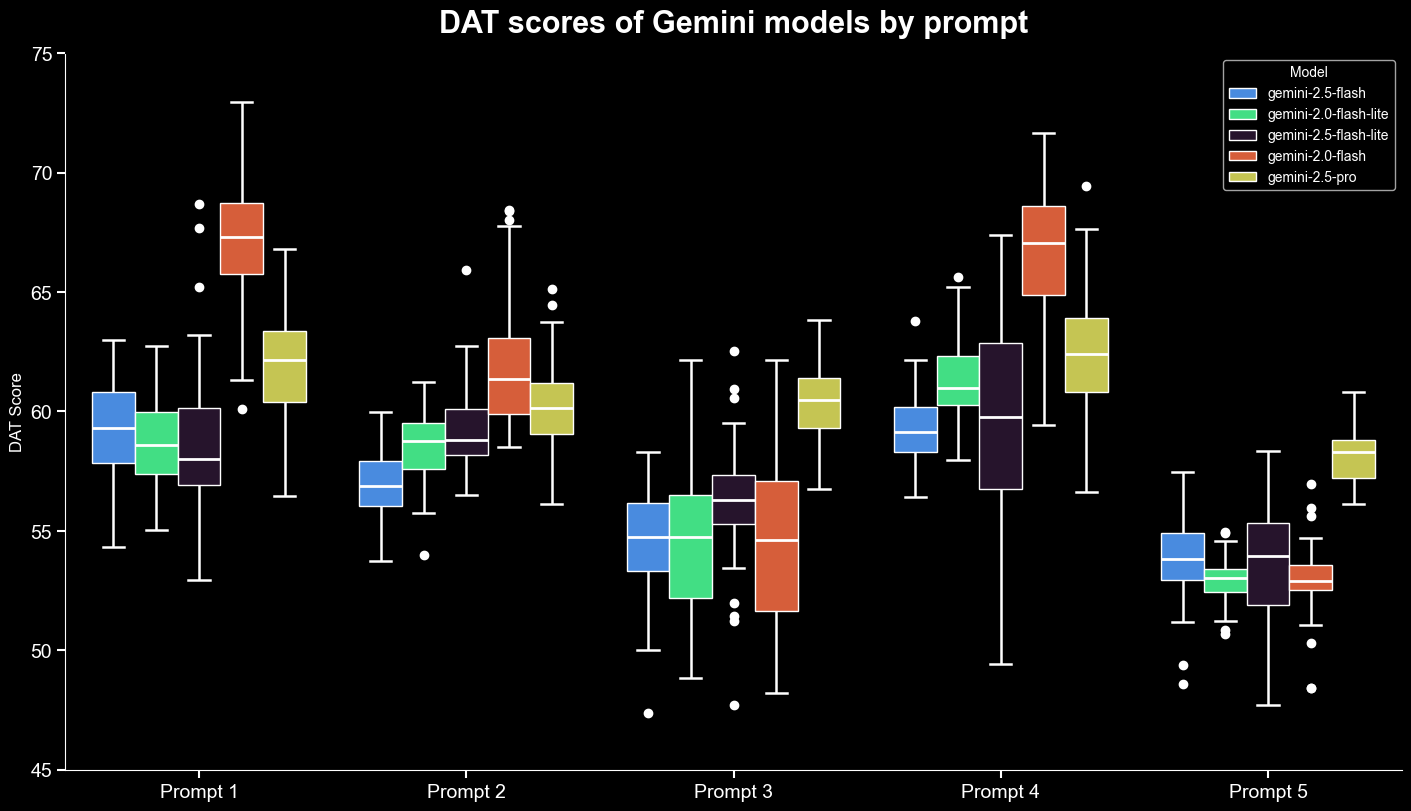

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

x_min=45
x_max=75

plt.figure(figsize=(14, 8), layout="constrained")
sns.boxplot(
    data=df,
    x='prompt',          # four temperature configs on x-axis
    y='score',                # DAT scores on y-axis
    hue='model',              # different box colors for each model
    palette=model_colors,      # your custom colors
    whiskerprops=dict(color='white', linewidth=1.8),
    capprops=dict(color='white', linewidth=1.8),
    boxprops=dict(edgecolor='white'),
    medianprops=dict(color='white', linewidth=2),
    flierprops=dict(markeredgecolor='white', markerfacecolor='white')
)
plot_title = "DAT scores of Gemini models by prompt"
plt.title(plot_title, fontsize=22, fontweight='bold', color=fg_color, pad=15)
plt.xlabel("", fontsize=12, color=fg_color)
plt.ylabel("DAT Score", fontsize=12, color=fg_color)
plt.ylim(x_min, x_max)

# Dark mode axis colors
ax = plt.gca()
ax.set_facecolor("black" if dark_mode else "white")
ax.tick_params(colors=fg_color)
plt.legend(title='Model', fontsize=10)

# Thicker spines
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1

ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

# plt.savefig("./results/plots/DAT_1.2_robust_boxplot_prompt.png", dpi=300, facecolor=plt.gcf().get_facecolor())

plt.show()


Effect of temperature and divergent thinking

In [21]:
import pprint

data_file = './results/DAT_1.1_effect_temperature_unnormalized.json'
dark_mode=True
embedding_models=['GloVe', 'BERT_WordEmbeddings_L6']
plot_title="DAT of gemini models evaluated using embedding ensamble"
x_axis_title="DAT Score"
show_benchmark=True
ascending=True
x_min=35
x_max=80
save_file=True
file_name="DAT_1.2_robust_DAT_diffTemp_diffPrompt.png"

model_colors = {
    'gemini-2.5-pro': "#ff7f00",
    'gemini-2.5-flash': '#b2df8a',
    'gemini-2.5-flash-lite': '#a6cee3',
    'gemini-2.0-flash': '#6a3d9a',
    'gemini-2.0-flash-lite': '#fb9a99',
}
    
# 1) Load & flatten JSON into a pandas DataFrame
try:
    with open(data_file, "r") as f:
        raw = json.load(f)
except json.JSONDecodeError as e:
    raise ValueError(f"Invalid JSON syntax in {data_file}: {e}") from None
except FileNotFoundError as e:
    raise FileNotFoundError(f"File {data_file} was not found!") from None

records = []
for model, cfg in raw.items():
    avg_models = []
    for emb_model, value in cfg.items():
        if emb_model in embedding_models:
            if emb_model == 'config':
                continue
            model_val = []
            for s in value:
                model_val.append(s)
            avg_models.append(model_val)
    # pprint.pprint(avg_models)
    # print()
    avg = [sum(x)/len(x) for x in zip(*avg_models)]
    # print(avg)
    # print()
    
    model_name = model.split("_")[0]
    model_config = model.split("_")[1]
    for score in avg:
        records.append((model_name, model_config, score))

df = pd.DataFrame(records, columns=['model', 'model_config', 'score'])

# 3) Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values(ascending=ascending)
    .index
    .tolist()
)
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)


In [22]:
df

,model,model_config,score
0,gemini-2.5-flash,"{""temperature"": 0.5}",60.490616
1,gemini-2.5-flash,"{""temperature"": 0.5}",61.864143
2,gemini-2.5-flash,"{""temperature"": 0.5}",59.133675
3,gemini-2.5-flash,"{""temperature"": 0.5}",58.510490
4,gemini-2.5-flash,"{""temperature"": 0.5}",59.148460
...,...,...,...
545,gemini-2.5-flash,"{""temperature"": 2.0}",57.627369
546,gemini-2.5-flash,"{""temperature"": 2.0}",61.718977
547,gemini-2.5-flash,"{""temperature"": 2.0}",62.830299
548,gemini-2.5-flash,"{""temperature"": 2.0}",61.014652


In [23]:
df['prompt'] = [f"Prompt {(i % 5)+1}" for i in range(len(df))]
df['temperature'] = df['model_config'].apply(lambda x: eval(x)["temperature"])

In [24]:
df

,model,model_config,score,prompt,temperature
0,gemini-2.5-flash,"{""temperature"": 0.5}",60.490616,Prompt 1,0.5
1,gemini-2.5-flash,"{""temperature"": 0.5}",61.864143,Prompt 2,0.5
2,gemini-2.5-flash,"{""temperature"": 0.5}",59.133675,Prompt 3,0.5
3,gemini-2.5-flash,"{""temperature"": 0.5}",58.510490,Prompt 4,0.5
4,gemini-2.5-flash,"{""temperature"": 0.5}",59.148460,Prompt 5,0.5
...,...,...,...,...,...
545,gemini-2.5-flash,"{""temperature"": 2.0}",57.627369,Prompt 1,2.0
546,gemini-2.5-flash,"{""temperature"": 2.0}",61.718977,Prompt 2,2.0
547,gemini-2.5-flash,"{""temperature"": 2.0}",62.830299,Prompt 3,2.0
548,gemini-2.5-flash,"{""temperature"": 2.0}",61.014652,Prompt 4,2.0


In [25]:
onl1_df = df

In [26]:
corr_value = onl1_df['score'].corr(onl1_df['temperature'])  # Pearson correlation by default
print(f"Correlation between score and temperature: {corr_value:.3f}")

Correlation between score and temperature: -0.090


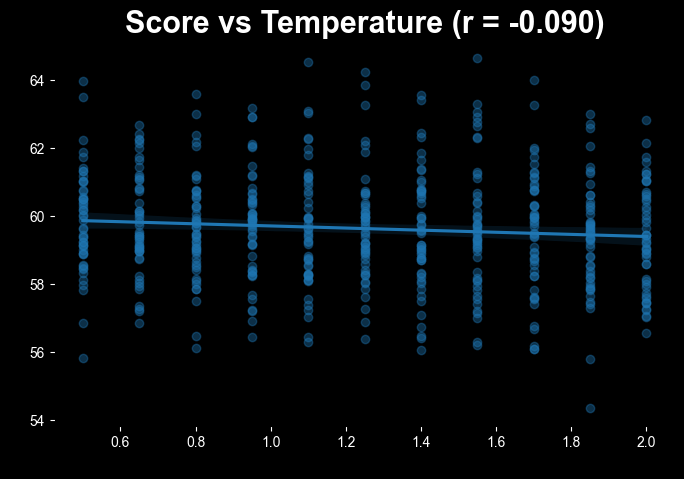

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.regplot(x='temperature', y='score', data=onl1_df, scatter_kws={'alpha':0.4})
plt.title(f'Score vs Temperature (r = {corr_value:.3f})', fontsize=22, fontweight='bold', color=fg_color)
plt.xlabel('Temperature')
plt.ylabel('Score')
plt.show()

Correlation between score and temperature: -0.090


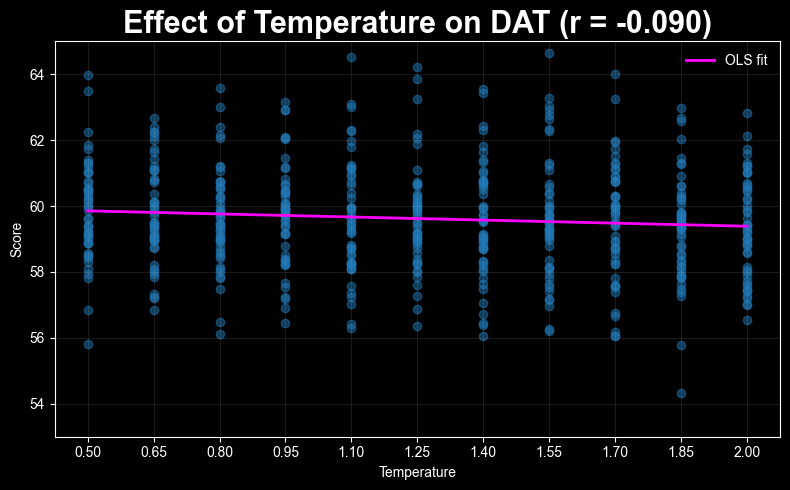

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# pick colors that contrast with your theme
fg = "white" if dark_mode else "black"
bg = "black" if dark_mode else "white"

x = df["temperature"].values
y = df["score"].values

# Pearson r
r = np.corrcoef(x, y)[0, 1]
print(f"Correlation between score and temperature: {r:.3f}")

# Fit simple OLS line
m, b = np.polyfit(x, y, 1)
xfit = np.linspace(x.min(), x.max(), 200)
yfit = m * xfit + b

fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor(bg)
ax.set_facecolor(bg)

# scatter
ax.scatter(x, y, alpha=0.5)

# regression line (different color)
ax.plot(xfit, yfit, linewidth=2, color="magenta", label="OLS fit")

# axes + labels visible
plt.title(
    f'Effect of Temperature on DAT (r = {corr_value:.3f})',
    fontsize=22,
    fontweight='bold',
    color=fg_color
)

ax.set_xlabel("Temperature", color=fg)
ax.set_ylabel("Score", color=fg)

# make ticks & spines visible against background
ax.tick_params(axis="both", colors=fg)
for spine in ax.spines.values():
    spine.set_color(fg)

# tidy ticks
ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=6))
ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=6))

order = [0.5, 0.65, 0.8, 0.95, 1.1, 1.25, 1.4, 1.55, 1.7, 1.85, 2.0]
ax.set_xticks(order)

# optional grid that works on both themes
ax.grid(True, alpha=0.15)

ax.legend(frameon=False, labelcolor=fg)
ymin, ymax = 53, 65
ax.set_ylim(ymin, ymax)

plt.tight_layout()

# plt.savefig("./results/plots/DAT_1.1_effect_temperatures.png", dpi=300, facecolor=plt.gcf().get_facecolor())
# plt.show()


Correlation between score and temperature: -0.090


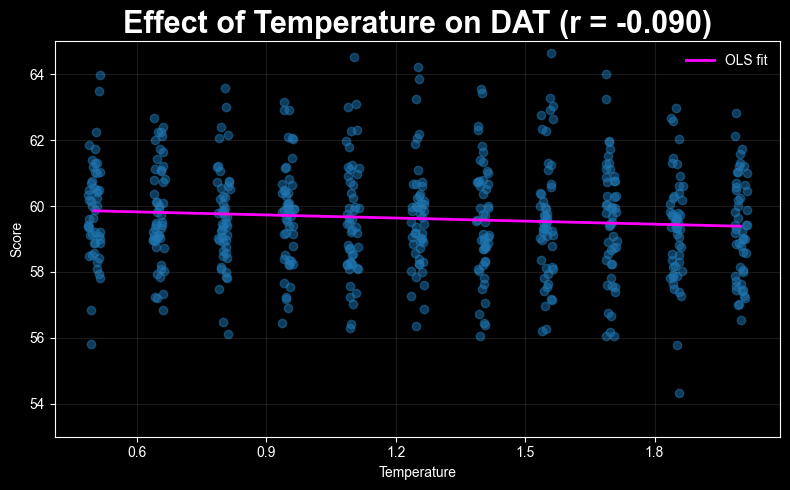

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- Parameters ---
ymin, ymax = 53, 65  # set your min and max score values here
jitter_strength = 0.02  # fraction of x-range used for jitter width

# pick colors that contrast with your theme
fg = "white" if dark_mode else "black"
bg = "black" if dark_mode else "white"

# --- Data ---
x = df["temperature"].values
y = df["score"].values

# --- Correlation ---
r = np.corrcoef(x, y)[0, 1]
print(f"Correlation between score and temperature: {r:.3f}")

# --- OLS line (use true x, not jittered) ---
m, b = np.polyfit(x, y, 1)
xfit = np.linspace(x.min(), x.max(), 200)
yfit = m * xfit + b

# --- Jitter x positions for plotting only ---
xr = x.max() - x.min() if x.size else 1.0
jwidth = jitter_strength * xr
x_jittered = x + (np.random.rand(len(x)) - 0.5) * jwidth

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor(bg)
ax.set_facecolor(bg)

# scatter with jitter
ax.scatter(x_jittered, y, alpha=0.5)

# regression line (no jitter)
ax.plot(xfit, yfit, linewidth=2, color="magenta", label="OLS fit")

# title and labels
plt.title(
    f'Effect of Temperature on DAT (r = {r:.3f})',
    fontsize=22,
    fontweight='bold',
    color=fg
)
ax.set_xlabel("Temperature", color=fg)
ax.set_ylabel("Score", color=fg)

# ticks / spines styling
ax.tick_params(axis="both", colors=fg)
for spine in ax.spines.values():
    spine.set_color(fg)

# tidy tick locators
ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=6))
ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=6))

# optional: custom x-ticks (comment out if not desired)
# order = [0.5, 0.65, 0.8, 0.95, 1.1, 1.25, 1.4, 1.55, 1.7, 1.85, 2.0]
# ax.set_xticks(order)

# y-limits user-defined
ax.set_ylim(ymin, ymax)

# grid and legend
ax.grid(True, alpha=0.15)
ax.legend(frameon=False, labelcolor=fg)

plt.tight_layout()
# plt.savefig("./results/plots/DAT_1.1_effect_temperature_.png", dpi=300,
#             facecolor=plt.gcf().get_facecolor())
plt.show()


Effect of thinking budget

In [19]:
import pprint

data_file = './results/DAT_1.1_effect_thinking_budget_unnormalized_results.json'
dark_mode=True
embedding_models=['GloVe', 'BERT_WordEmbeddings_L6']
plot_title="DAT of gemini models evaluated using embedding ensamble"
x_axis_title="DAT Score"
show_benchmark=True
ascending=True
x_min=35
x_max=80
save_file=True
file_name="DAT_1.2_robust_DAT_diffTemp_diffPrompt.png"

model_colors = {
    'gemini-2.5-pro': "#ff7f00",
    'gemini-2.5-flash': '#b2df8a',
    'gemini-2.5-flash-lite': '#a6cee3',
    'gemini-2.0-flash': '#6a3d9a',
    'gemini-2.0-flash-lite': '#fb9a99',
}
    
# 1) Load & flatten JSON into a pandas DataFrame
try:
    with open(data_file, "r") as f:
        raw = json.load(f)
except json.JSONDecodeError as e:
    raise ValueError(f"Invalid JSON syntax in {data_file}: {e}") from None
except FileNotFoundError as e:
    raise FileNotFoundError(f"File {data_file} was not found!") from None
import json

records = []
for model, cfg in raw.items():
    avg_models = []
    for emb_model, value in cfg.items():
        if emb_model in embedding_models:
            if emb_model == 'config':
                continue
            model_val = []
            for s in value:
                model_val.append(s)
            avg_models.append(model_val)
    # pprint.pprint(avg_models)
    # print()
    avg = [sum(x)/len(x) for x in zip(*avg_models)]
    # print(avg)
    # print()
    
    model_name = model.split("_")[0]
    model_config = "".join(model.split("_")[1:])
    tmp = json.loads(model_config)
    thinking_budget = int(tmp["thinkingbudget"])

    for score in avg:
        records.append((model_name, model_config, thinking_budget, score))

df = pd.DataFrame(records, columns=['model', 'model_config', 'thinking_budget', 'score'])

# 3) Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values(ascending=ascending)
    .index
    .tolist()
)
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)
df['prompt'] = [f"Prompt {(i % 5)+1}" for i in range(len(df))]

In [20]:
df

,model,model_config,thinking_budget,score,prompt
0,gemini-2.5-flash,"{""temperature"": 1, ""thinkingbudget"": 20}",20,59.256042,Prompt 1
1,gemini-2.5-flash,"{""temperature"": 1, ""thinkingbudget"": 20}",20,59.524229,Prompt 2
2,gemini-2.5-flash,"{""temperature"": 1, ""thinkingbudget"": 20}",20,56.938091,Prompt 3
3,gemini-2.5-flash,"{""temperature"": 1, ""thinkingbudget"": 20}",20,58.636253,Prompt 4
4,gemini-2.5-flash,"{""temperature"": 1, ""thinkingbudget"": 20}",20,57.591656,Prompt 5
...,...,...,...,...,...
645,gemini-2.5-flash,"{""temperature"": 1, ""thinkingbudget"": 8000}",8000,57.731798,Prompt 1
646,gemini-2.5-flash,"{""temperature"": 1, ""thinkingbudget"": 8000}",8000,58.762135,Prompt 2
647,gemini-2.5-flash,"{""temperature"": 1, ""thinkingbudget"": 8000}",8000,59.342035,Prompt 3
648,gemini-2.5-flash,"{""temperature"": 1, ""thinkingbudget"": 8000}",8000,65.479671,Prompt 4


In [21]:
corr_value = df['score'].corr(df['thinking_budget'])
print(f"Correlation between score and temperature: {corr_value:.3f}")

Correlation between score and temperature: 0.216


Correlation between score and thinking_budget index: 0.287


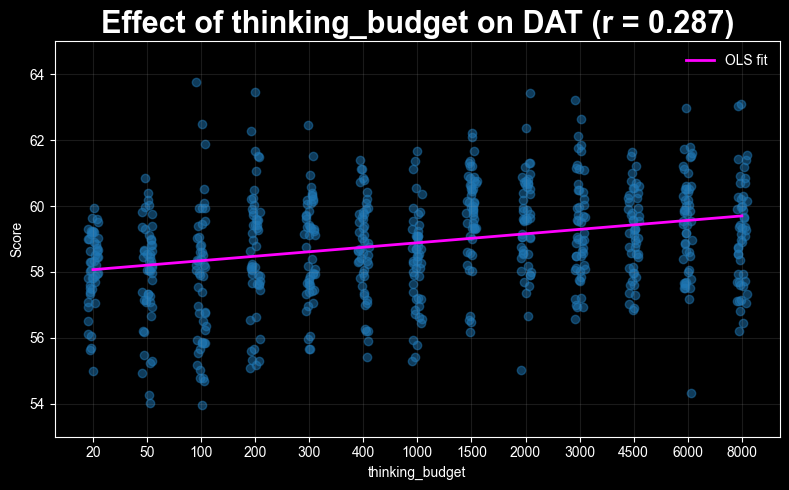

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --- Parameters ---
ymin, ymax = 53, 65  # <-- choose your min and max score values here
jitter_strength = 0.2  # how wide the jitter spreads

# pick colors that contrast with your theme
fg = "white" if dark_mode else "black"
bg = "black" if dark_mode else "white"

# categories and mapping to numeric indices
categories = sorted(df["thinking_budget"].unique())
x_numeric = np.array([categories.index(c) for c in df["thinking_budget"]])
y = df["score"].values

# jitter the x positions for plotting
x_jittered = np.array([xn + (random.random() - 0.5) * jitter_strength for xn in x_numeric])

# --- Correlation on numeric x ---
r = np.corrcoef(x_numeric, y)[0, 1]
print(f"Correlation between score and thinking_budget index: {r:.3f}")

# --- OLS line on numeric x ---
m, b = np.polyfit(x_numeric, y, 1)
xfit = np.linspace(min(x_numeric), max(x_numeric), 200)
yfit = m * xfit + b

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor(bg)
ax.set_facecolor(bg)

# scatter with jitter
ax.scatter(x_jittered, y, alpha=0.5)

# regression line (no jitter)
ax.plot(xfit, yfit, linewidth=2, color="magenta", label="OLS fit")

# ticks / labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)

plt.title(
    f'Effect of thinking_budget on DAT (r = {r:.3f})',
    fontsize=22,
    fontweight='bold',
    color=fg
)

ax.set_xlabel("thinking_budget", color=fg)
ax.set_ylabel("Score", color=fg)

ax.tick_params(axis="both", colors=fg)
for spine in ax.spines.values():
    spine.set_color(fg)

# y-limits user-defined
ax.set_ylim(ymin, ymax)

# grid and legend
ax.grid(True, alpha=0.15)
ax.legend(frameon=False, labelcolor=fg)

plt.tight_layout()
# plt.savefig("./results/plots/DAT_1.1_effect_thinking_budget_.png", dpi=300, facecolor=plt.gcf().get_facecolor())
# plt.show()


## HardDAT

In [28]:
import pprint
data_file = './results/HardDAT_1.0_robust_diffTemp_diffPrompts_unnormalized.json'
dark_mode=True
embedding_models=['GloVe', 'BERT_WordEmbeddings_L6']
plot_title="DAT of gemini models evaluated using embedding ensamble"
x_axis_title="DAT Score"
show_benchmark=True
ascending=True
x_min=35
x_max=80
save_file=True
file_name="DAT_1.2_robust_DAT_diffTemp_diffPrompt.png"
    
# 1) Load & flatten JSON into a pandas DataFrame
try:
    with open(data_file, "r") as f:
        raw = json.load(f)
except json.JSONDecodeError as e:
    raise ValueError(f"Invalid JSON syntax in {data_file}: {e}") from None
except FileNotFoundError as e:
    raise FileNotFoundError(f"File {data_file} was not found!") from None

letters = list("abcdefghiklmnoprstuwy")

records = []
for model, cfg in raw.items():
    avg_models = []
    for emb_model, value in cfg.items():
        if emb_model in embedding_models:
            if emb_model == 'config':
                continue
            model_val = []
            for s in value:
                model_val.append(s)
            avg_models.append(model_val)

    avg = [sum(x)/len(x) for x in zip(*avg_models)]
    
    model_name = model.split("_")[0]
    model_config = model.split("_")[1]

    # enumerate avg to know index (letter)
    for idx, score in enumerate(avg):
        letter = letters[idx % len(letters)]  # safety if more than 21
        records.append((model_name, model_config, letter, score))

df = pd.DataFrame(records, columns=['model', 'model_config', 'letter', 'score'])

# 3) Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values(ascending=ascending)
    .index
    .tolist()
)
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)


In [29]:
df

,model,model_config,letter,score
0,gemini-2.5-flash-lite,"{""temperature"": 0.5}",a,68.682743
1,gemini-2.5-flash-lite,"{""temperature"": 0.5}",b,66.237568
2,gemini-2.5-flash-lite,"{""temperature"": 0.5}",c,70.338249
3,gemini-2.5-flash-lite,"{""temperature"": 0.5}",d,59.254633
4,gemini-2.5-flash-lite,"{""temperature"": 0.5}",e,62.894188
...,...,...,...,...
415,gemini-2.0-flash-lite,"{""temperature"": 2}",s,65.374249
416,gemini-2.0-flash-lite,"{""temperature"": 2}",t,65.793571
417,gemini-2.0-flash-lite,"{""temperature"": 2}",u,70.358608
418,gemini-2.0-flash-lite,"{""temperature"": 2}",w,63.036253


/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_47895/3707312991.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

gemini-2.0-flash-lite vs. gemini-2.5-pro: Custom statistical test, P_val:3.479e-03
gemini-2.5-flash vs. gemini-2.0-flash: Custom statistical test, P_val:1.868e-02
gemini-2.0-flash-lite vs. gemini-2.0-flash: Custom statistical test, P_val:1.012e-03


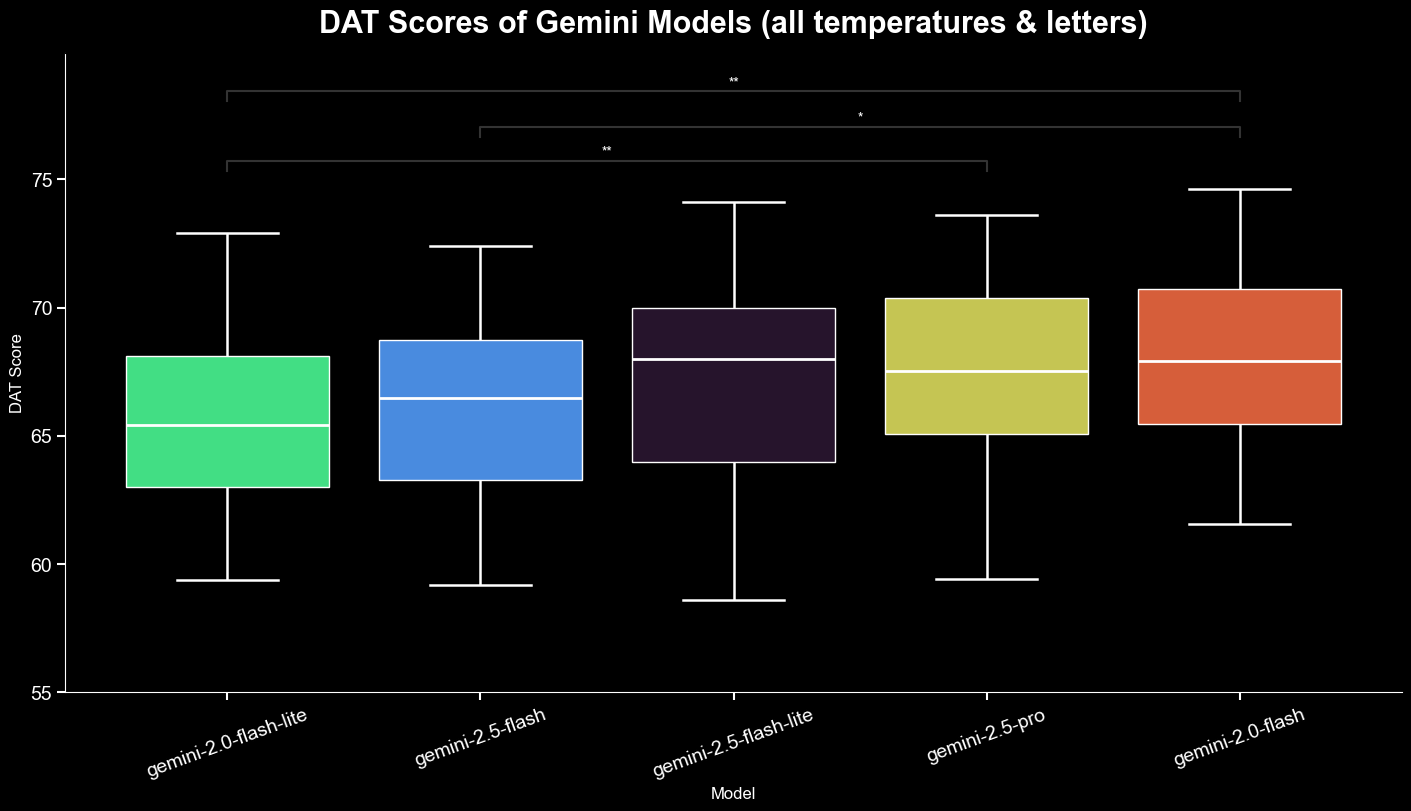

In [36]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator

model_colors = {
    'gemini-2.5-pro':       '#D8D840',  # yellow
    'gemini-2.5-flash':     '#3088F8',  # blue
    'gemini-2.5-flash-lite':'#281030',  # deep purple
    'gemini-2.0-flash':     '#F05020',  # orange
    'gemini-2.0-flash-lite':'#28F880',  # green
}

# ========== Plot ==========
plt.figure(figsize=(14, 8), layout="constrained")
ax = sns.boxplot(
    data=df,
    x='model',
    y='score',
    palette=model_colors,
    whiskerprops=dict(color='white', linewidth=1.8),
    capprops=dict(color='white', linewidth=1.8),
    boxprops=dict(edgecolor='white'),
    medianprops=dict(color='white', linewidth=2),
    flierprops=dict(markeredgecolor='white', markerfacecolor='white')
)

plot_title = "DAT Scores of Gemini Models (all temperatures & letters)"
plt.title(plot_title, fontsize=22, fontweight='bold', color=fg_color, pad=15)
plt.xlabel("Model", fontsize=12, color=fg_color)
plt.ylabel("DAT Score", fontsize=12, color=fg_color)
plt.ylim(55, 75)

# Dark mode axis colors
ax.set_facecolor("black" if dark_mode else "white")
ax.tick_params(colors=fg_color)
plt.xticks(rotation=20, color=fg_color)

# ========== Pairwise MWU + Bonferroni, annotate only significant ==========
order = [t.get_text() for t in ax.get_xticklabels()]
pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i+1, len(order))]

# Compute raw p-values (two-sided). 'method'='auto' chooses exact/asymptotic as appropriate.
raw_pvals = []
for a, b in pairs:
    xa = df.loc[df['model'] == a, 'score'].values
    xb = df.loc[df['model'] == b, 'score'].values
    p = mannwhitneyu(xa, xb, alternative='two-sided', method='auto').pvalue
    raw_pvals.append(p)

# Bonferroni adjust
m = len(raw_pvals)
adj_pvals = [min(p * m, 1.0) for p in raw_pvals]

# Keep only significant pairs
alpha = 0.05
sig_pairs = [pair for pair, p in zip(pairs, adj_pvals) if p < alpha]
sig_pvals = [p for p in adj_pvals if p < alpha]

if sig_pairs:
    annot = Annotator(ax, sig_pairs, data=df, x='model', y='score', order=order)
    annot.configure(text_format='star', show_test_name=False, loc='inside')
    annot.set_pvalues_and_annotate(pvalues=sig_pvals)
else:
    print(f"No significant pairwise differences at alpha={alpha} after Bonferroni.")
    
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1

ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

plt.savefig("./results/plots/HardDAT_1.0_robust.png",
            dpi=300,
            facecolor=plt.gcf().get_facecolor())
plt.show()


In [37]:
# Filter only gemini-2.0-flash
flash_df = df[df['model'] == 'gemini-2.0-flash']
flash_df

,model,model_config,letter,score
252,gemini-2.0-flash,"{""temperature"": 0.5}",a,63.860361
253,gemini-2.0-flash,"{""temperature"": 0.5}",b,69.425154
254,gemini-2.0-flash,"{""temperature"": 0.5}",c,66.457552
255,gemini-2.0-flash,"{""temperature"": 0.5}",d,62.986494
256,gemini-2.0-flash,"{""temperature"": 0.5}",e,70.435223
...,...,...,...,...
331,gemini-2.0-flash,"{""temperature"": 2}",s,67.098957
332,gemini-2.0-flash,"{""temperature"": 2}",t,63.752548
333,gemini-2.0-flash,"{""temperature"": 2}",u,71.824409
334,gemini-2.0-flash,"{""temperature"": 2}",w,67.626743


/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_47895/2605336143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


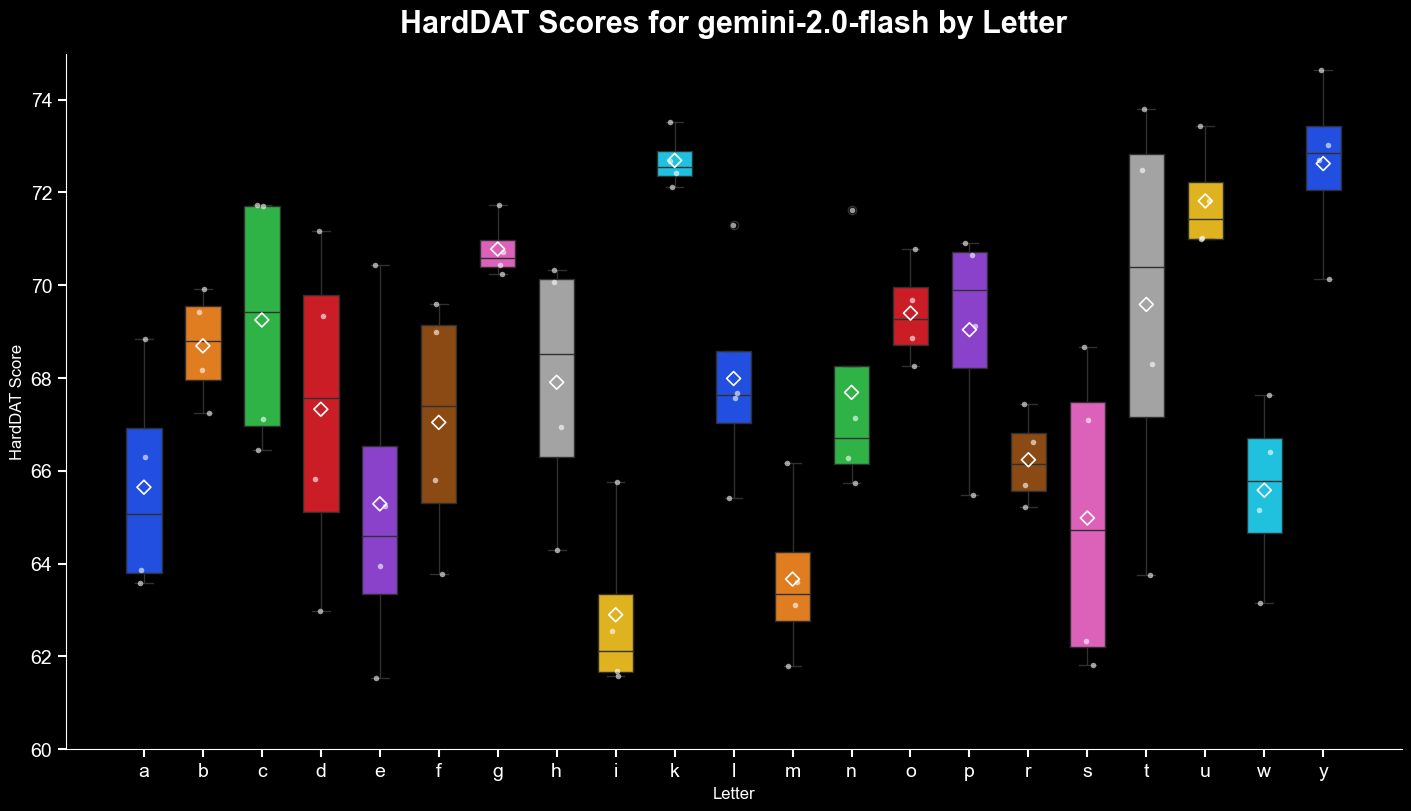

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8), layout="constrained")

# 1) Boxplot by letter (collapses across temperatures)
sns.boxplot(
    data=flash_df,
    x='letter',
    y='score',
    palette='bright',     # or any palette you prefer
    width=0.6
)

# 2) All actual values as dots (jittered)
dot_color = ("white" if dark_mode else "black")
sns.stripplot(
    data=flash_df,
    x='letter',
    y='score',
    color=dot_color,
    alpha=0.6,
    jitter=0.1,
    dodge=False,
    size=4,
    zorder=10
)

# (Optional) Overlay per-letter means as diamonds
means = flash_df.groupby('letter', observed=False)['score'].mean()
plt.scatter(
    x=means.index,
    y=means.values,
    marker='D',
    s=50,
    edgecolor=dot_color,
    facecolor='none',
    linewidth=1.2,
    zorder=11,
)

plot_title = "HardDAT Scores for gemini-2.0-flash by Letter"
plt.title(plot_title, fontsize=22, fontweight='bold', color=fg_color, pad=15)
plt.xlabel("Letter", fontsize=12, color=fg_color)
plt.ylabel("HardDAT Score", fontsize=12, color=fg_color)
plt.ylim(60, 75)

# Dark mode axis colors
ax = plt.gca()
ax.set_facecolor("black" if dark_mode else "white")
ax.tick_params(colors=fg_color)
plt.xticks(color=fg_color)
plt.yticks(color=fg_color)

# Thicker spines
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1

ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)


plt.savefig("./results/plots/HardDAT_gemini-2.0-flash_by_letter_boxplot.png",
            dpi=300,
            facecolor=plt.gcf().get_facecolor())

plt.show()


## SDAT

In [139]:
records = []
with open("results/SDAT_1.0_onlyGoogle_10_words_results.json", "r") as f:
    raw = json.load(f)

for entry in raw:
    config_dict = entry["config"]
    for model_name, values in entry.items():
        if model_name == "config":
            continue
        for conf_l, val_list in values.items():
            for val in val_list:
                records.append((model_name.split("/")[1], conf_l, config_dict['language'], 10, val))

with open("results/SDAT_1.0_onlyGoogle_25_words_results.json", "r") as f:
    raw = json.load(f)

for entry in raw:
    config_dict = entry["config"]
    for model_name, values in entry.items():
        if model_name == "config":
            continue
        for conf_l, val_list in values.items():
            for val in val_list:
                records.append((model_name.split("/")[1], conf_l, config_dict['language'], 25, val))
                
with open("results/SDAT_1.1_anthropic_openai_10_words_results.json", "r") as f:
    raw = json.load(f)

for entry in raw:
    config_dict = entry["config"]
    for model_name, values in entry.items():
        if model_name == "config":
            continue
        for conf_l, val_list in values.items():
            for val in val_list:
                records.append((model_name.split("/")[1], conf_l, config_dict['language'], 10, val))

with open("results/SDAT_1.1_anthropic_openai_25_words_results.json", "r") as f:
    raw = json.load(f)

for entry in raw:
    config_dict = entry["config"]
    for model_name, values in entry.items():
        if model_name == "config":
            continue
        for conf_l, val_list in values.items():
            for val in val_list:
                records.append((model_name.split("/")[1], conf_l, config_dict['language'], 25, val))


df = pd.DataFrame(records, columns=['model', 'config', 'language', 'n_words', 'score'])

# 3) Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values(ascending=ascending)
    .index
    .tolist()
)

df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)
df

,model,config,language,n_words,score
0,gemma3n:e4b,"{""temperature"": 1}",English,10,30.971604
1,gemma3n:e4b,"{""temperature"": 1}",English,10,30.847401
2,gemma3n:e4b,"{""temperature"": 1}",English,10,30.790385
3,gemma3n:e4b,"{""temperature"": 1}",English,10,31.635791
4,gemma3n:e4b,"{""temperature"": 1}",English,10,31.018845
...,...,...,...,...,...
4306,gpt-5,"{""temperature"": 1}",Czech,25,29.662540
4307,gpt-5,"{""temperature"": 1}",Czech,25,29.297852
4308,gpt-5,"{""temperature"": 1}",Czech,25,30.879995
4309,gpt-5,"{""temperature"": 1}",Czech,25,29.903644


In [140]:
dark_mode=True
show_benchmark=True
ascending=True
x_min=35
x_max=80
save_file=True
file_name="DAT_1.2_robust_DAT_diffTemp_diffPrompt.png"

model_colors = {
    'gemini-2.5-pro': "#ff7f00",
    'gemini-2.5-flash': '#b2df8a',
    'gemini-2.5-flash-lite': '#a6cee3',
    'gemini-2.0-flash': '#6a3d9a',
    'gemini-2.0-flash-lite': '#fb9a99',
}

/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_36512/2000180704.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_df.groupby("model")["score"]
/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_36512/2000180704.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)


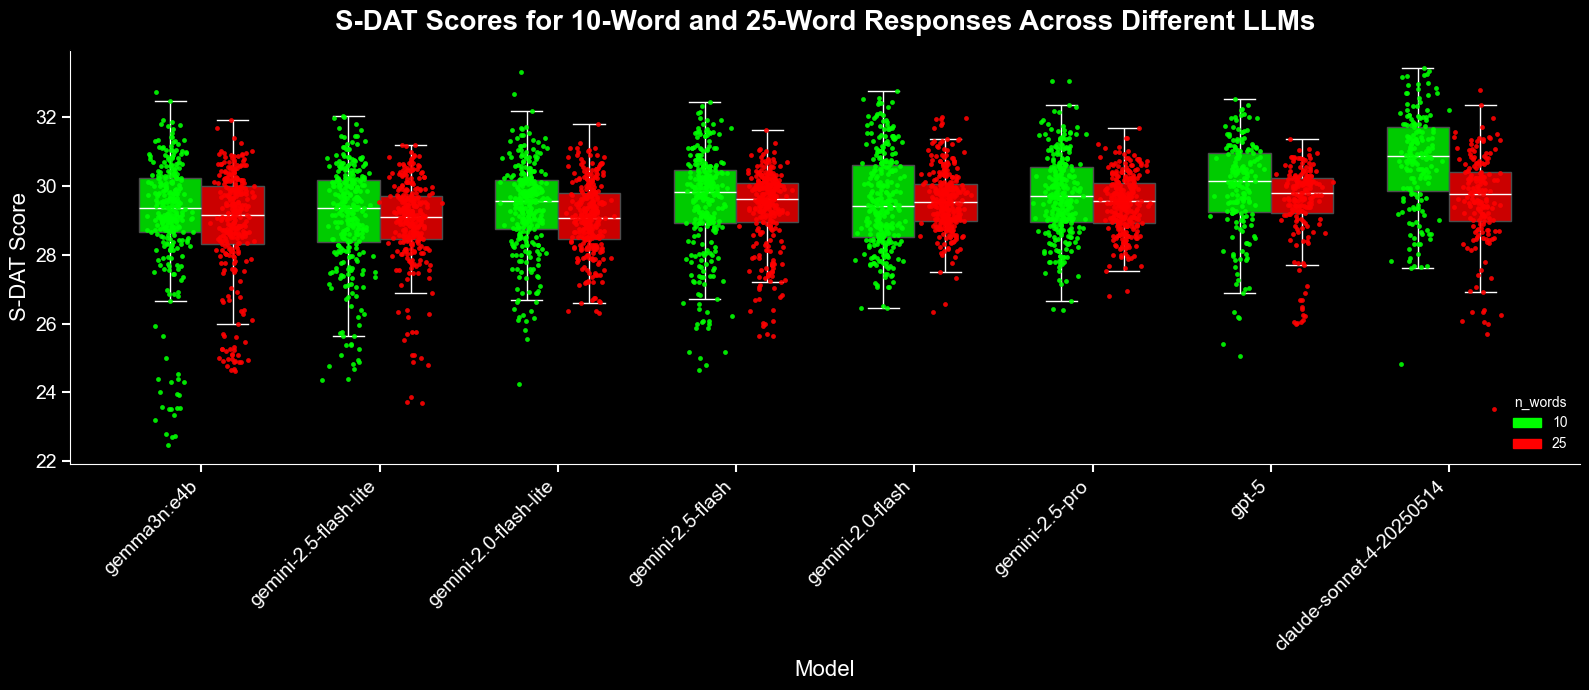

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# --- your real dataframe ---
# df = pd.read_csv(...)

# Keep only n_words 10 & 25
filtered_df = df[df["n_words"].isin([10, 25])].copy()

# Order models from lowest overall mean to highest
order = (
    filtered_df.groupby("model")["score"]
    .mean()
    .sort_values()
    .index
    .tolist()
)

# ---------------- Dark mode styling ----------------
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# Semi-transparent boxes
pal = {10: (0/255, 255/255, 0/255, 0.8),  # semi-transparent green
       25: (255/255, 0/255, 0/255, 0.8)}  # semi-transparent red

# Bright scatter colors
point_pal = {10: "#00FF00", 25: "#FF0000"}

fig, ax = plt.subplots(figsize=(16, 7))

# Draw boxplot
sns.boxplot(
    data=filtered_df, x="model", y="score", hue="n_words",
    order=order, palette=pal, fliersize=0, width=0.7,
    saturation=1, ax=ax
)

# Make median & whiskers white
for artist in ax.artists:
    artist.set_edgecolor('white')
for line in ax.lines:
    line.set_color('white')

# ==== Scatter points manually to align with boxes ====
# Compute x positions exactly like Seaborn
n_hue = 2  # we know there are 2 (10 and 25)
group_width = 0.7
inner_gap = group_width / n_hue
offsets = [-inner_gap/2, inner_gap/2]

for i, model in enumerate(order):
    for j, n_words_val in enumerate([10, 25]):
        sub = filtered_df[(filtered_df["model"] == model) & (filtered_df["n_words"] == n_words_val)]
        # exact x positions = base index + offset + random jitter
        x_positions = np.random.normal(loc=i + offsets[j], scale=0.05, size=len(sub))
        ax.scatter(
            x_positions,
            sub["score"],
            color=point_pal[n_words_val],
            alpha=0.9,
            s=12,
            linewidths=0,
            zorder=10
        )

# Labels, title, ticks
ax.set_xlabel("Model", fontsize=16, color=fg_color)
ax.set_ylabel("S-DAT Score", fontsize=16, color=fg_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)
ax.set_title(
    "S-DAT Scores for 10-Word and 25-Word Responses Across Different LLMs",
    color=fg_color, fontweight="bold", fontsize=20, pad=14
)

# Keep spines visible but recolor them for dark mode
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1
    
ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

# Legend bottom-right inside the plot
handles = [Patch(facecolor=point_pal[k], edgecolor=point_pal[k], label=str(k)) for k in [10, 25]]
leg = ax.legend(
    handles=handles, title="n_words", loc="lower right",
    frameon=False
)
leg.get_title().set_color(fg_color)
for t in leg.get_texts():
    t.set_color(fg_color)

plt.tight_layout()
plt.savefig("./results/plots/SDAT_1.0_all_models.png",
                dpi=300,
                facecolor=plt.gcf().get_facecolor())
plt.show()


/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_36512/86980305.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)


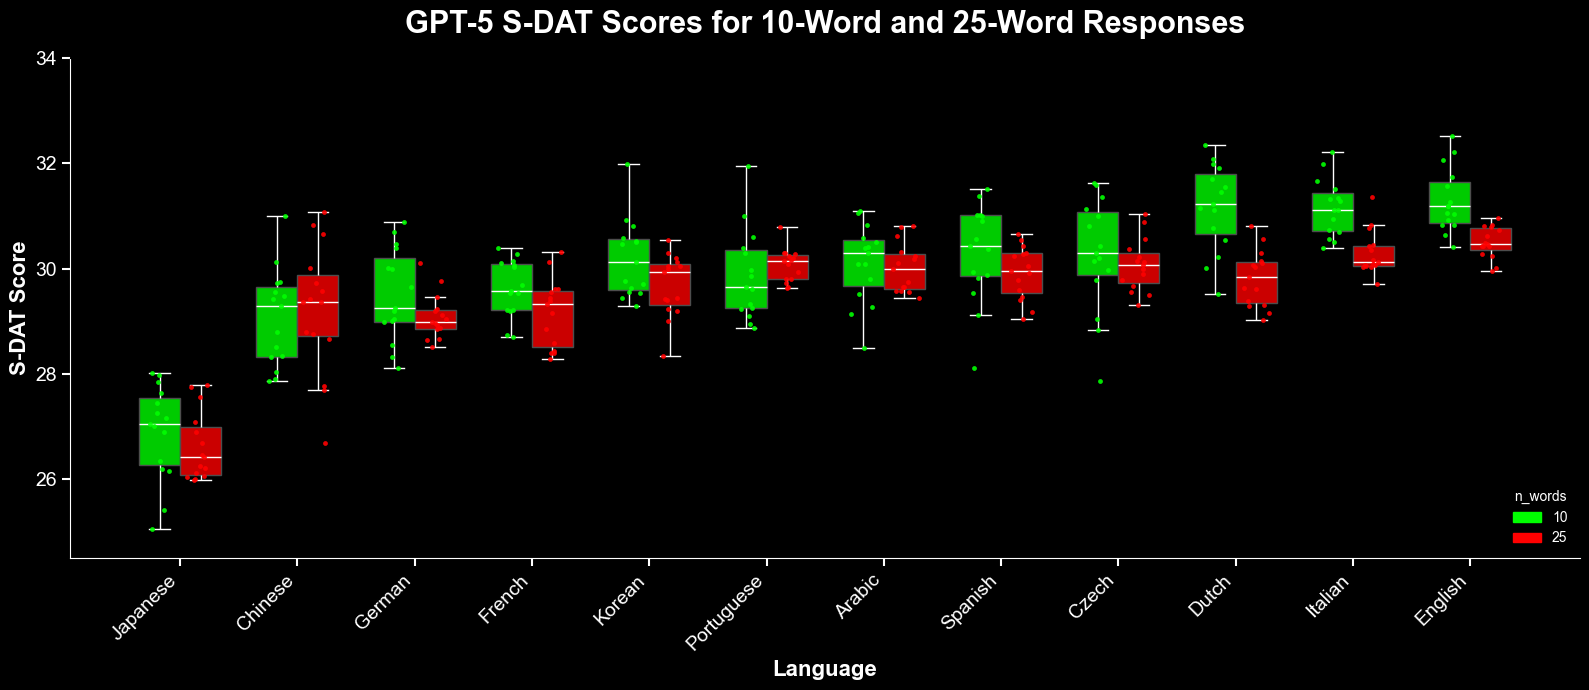

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

model_name_plot = "gpt-5"

# Filter only gemini-gemini-2.5-pro and n_words=10 & 25
sub_df = df[
    (df["model"] == model_name_plot)
    & (df["n_words"].isin([10, 25]))
].copy()

# Order languages from lowest mean score to highest
order = (
    sub_df.groupby("language")["score"]
    .mean()
    .sort_values()
    .index
    .tolist()
)

# ---------------- Dark mode styling ----------------
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# Semi-transparent boxes
pal = {10: (0/255, 255/255, 0/255, 0.8),  # green
       25: (255/255, 0/255, 0/255, 0.8)}  # red
# Bright scatter colors
point_pal = {10: "#00FF00", 25: "#FF0000"}

fig, ax = plt.subplots(figsize=(16, 7))

# Boxplot
sns.boxplot(
    data=sub_df, x="language", y="score", hue="n_words",
    order=order, palette=pal, fliersize=0, width=0.7,
    saturation=1, ax=ax
)

# Make median & whiskers white
for artist in ax.artists:
    artist.set_edgecolor('white')
for line in ax.lines:
    line.set_color('white')

# ==== Scatter points manually ====
n_hue = 2
group_width = 0.7
inner_gap = group_width / n_hue
offsets = [-inner_gap/2, inner_gap/2]

for i, lang in enumerate(order):
    for j, n_words_val in enumerate([10, 25]):
        sub = sub_df[(sub_df["language"] == lang) & (sub_df["n_words"] == n_words_val)]
        x_positions = np.random.normal(loc=i + offsets[j], scale=0.05, size=len(sub))
        ax.scatter(
            x_positions,
            sub["score"],
            color=point_pal[n_words_val],
            alpha=0.9,
            s=12,
            linewidths=0,
            zorder=10
        )

# Labels, title, ticks
ax.set_xlabel("Language", color=fg_color, fontsize=16, fontweight='bold')
ax.set_ylabel("S-DAT Score", color=fg_color, fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)
ax.set_title(
    "GPT-5 S-DAT Scores for 10-Word and 25-Word Responses",
    color=fg_color, fontweight="bold", fontsize=22, pad=18
)

# Thicker spines
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1

ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

# Legend bottom-right inside the plot
handles = [Patch(facecolor=point_pal[k], edgecolor=point_pal[k], label=str(k)) for k in [10, 25]]
leg = ax.legend(
    handles=handles, title="n_words", loc="lower right",
    frameon=False
)
leg.get_title().set_color(fg_color)
for t in leg.get_texts():
    t.set_color(fg_color)
    
plt.ylim(24.5, 34)

plt.tight_layout()

plt.savefig("./results/plots/SDAT_1.1_gpt-5-languages.png",
                dpi=300,
                facecolor=plt.gcf().get_facecolor())

plt.show()


/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_36512/2567468079.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)


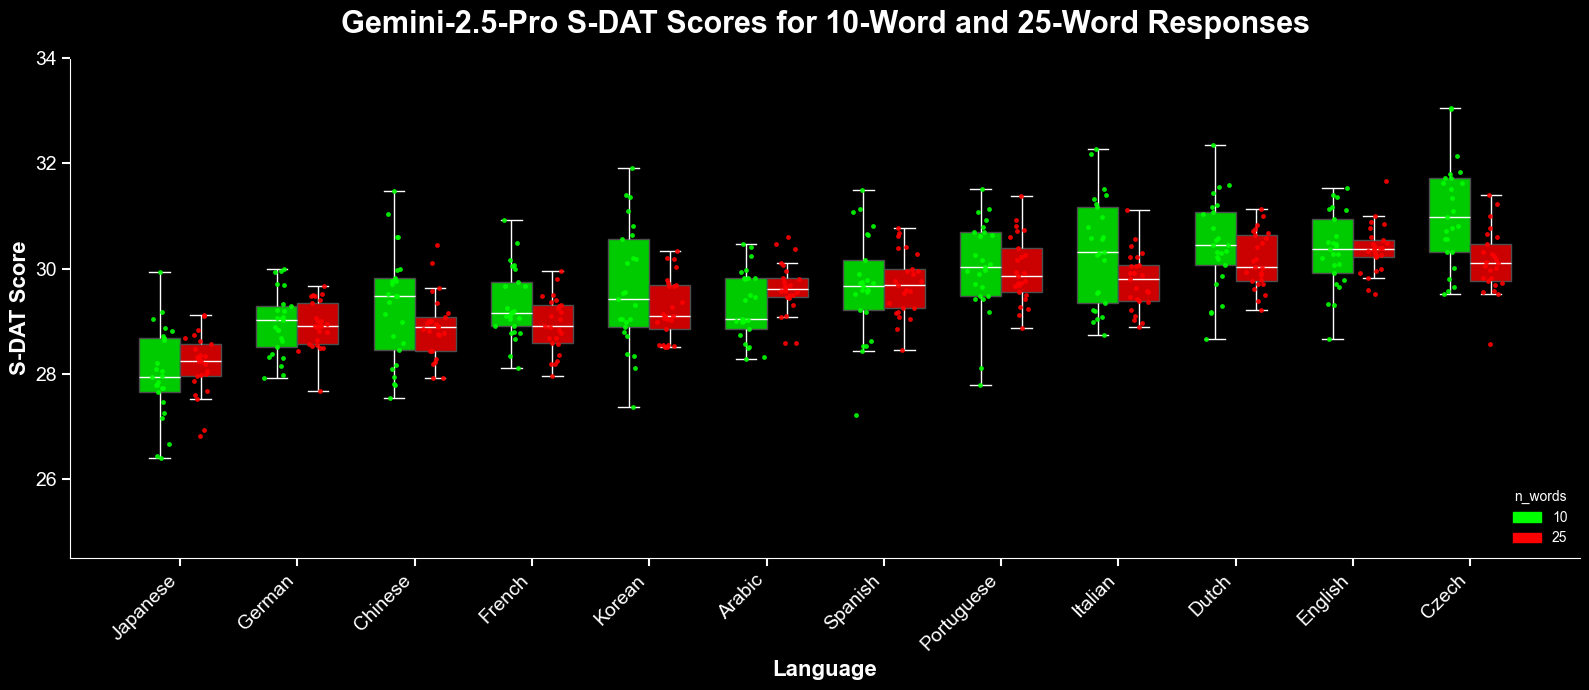

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

model_name_plot = "gemini-2.5-pro"

# Filter only gemini-gemini-2.5-pro and n_words=10 & 25
sub_df = df[
    (df["model"] == model_name_plot)
    & (df["n_words"].isin([10, 25]))
].copy()

# Order languages from lowest mean score to highest
order = (
    sub_df.groupby("language")["score"]
    .mean()
    .sort_values()
    .index
    .tolist()
)

# ---------------- Dark mode styling ----------------
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# Semi-transparent boxes
pal = {10: (0/255, 255/255, 0/255, 0.8),  # green
       25: (255/255, 0/255, 0/255, 0.8)}  # red
# Bright scatter colors
point_pal = {10: "#00FF00", 25: "#FF0000"}

fig, ax = plt.subplots(figsize=(16, 7))

# Boxplot
sns.boxplot(
    data=sub_df, x="language", y="score", hue="n_words",
    order=order, palette=pal, fliersize=0, width=0.7,
    saturation=1, ax=ax
)

# Make median & whiskers white
for artist in ax.artists:
    artist.set_edgecolor('white')
for line in ax.lines:
    line.set_color('white')

# ==== Scatter points manually ====
n_hue = 2
group_width = 0.7
inner_gap = group_width / n_hue
offsets = [-inner_gap/2, inner_gap/2]

for i, lang in enumerate(order):
    for j, n_words_val in enumerate([10, 25]):
        sub = sub_df[(sub_df["language"] == lang) & (sub_df["n_words"] == n_words_val)]
        x_positions = np.random.normal(loc=i + offsets[j], scale=0.05, size=len(sub))
        ax.scatter(
            x_positions,
            sub["score"],
            color=point_pal[n_words_val],
            alpha=0.9,
            s=12,
            linewidths=0,
            zorder=10
        )

# Labels, title, ticks
ax.set_xlabel("Language", color=fg_color, fontsize=16, fontweight='bold')
ax.set_ylabel("S-DAT Score", color=fg_color, fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)
ax.set_title(
    "Gemini-2.5-Pro S-DAT Scores for 10-Word and 25-Word Responses",
    color=fg_color, fontweight="bold", fontsize=22, pad=18
)

# Thicker spines
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1

ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

# Legend bottom-right inside the plot
handles = [Patch(facecolor=point_pal[k], edgecolor=point_pal[k], label=str(k)) for k in [10, 25]]
leg = ax.legend(
    handles=handles, title="n_words", loc="lower right",
    frameon=False
)
leg.get_title().set_color(fg_color)
for t in leg.get_texts():
    t.set_color(fg_color)
    
plt.ylim(24.5, 34)

plt.tight_layout()

plt.savefig("./results/plots/SDAT_1.1_gemini-2.5-pro-languages.png",
                dpi=300,
                facecolor=plt.gcf().get_facecolor())

plt.show()


/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_36512/280001866.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)


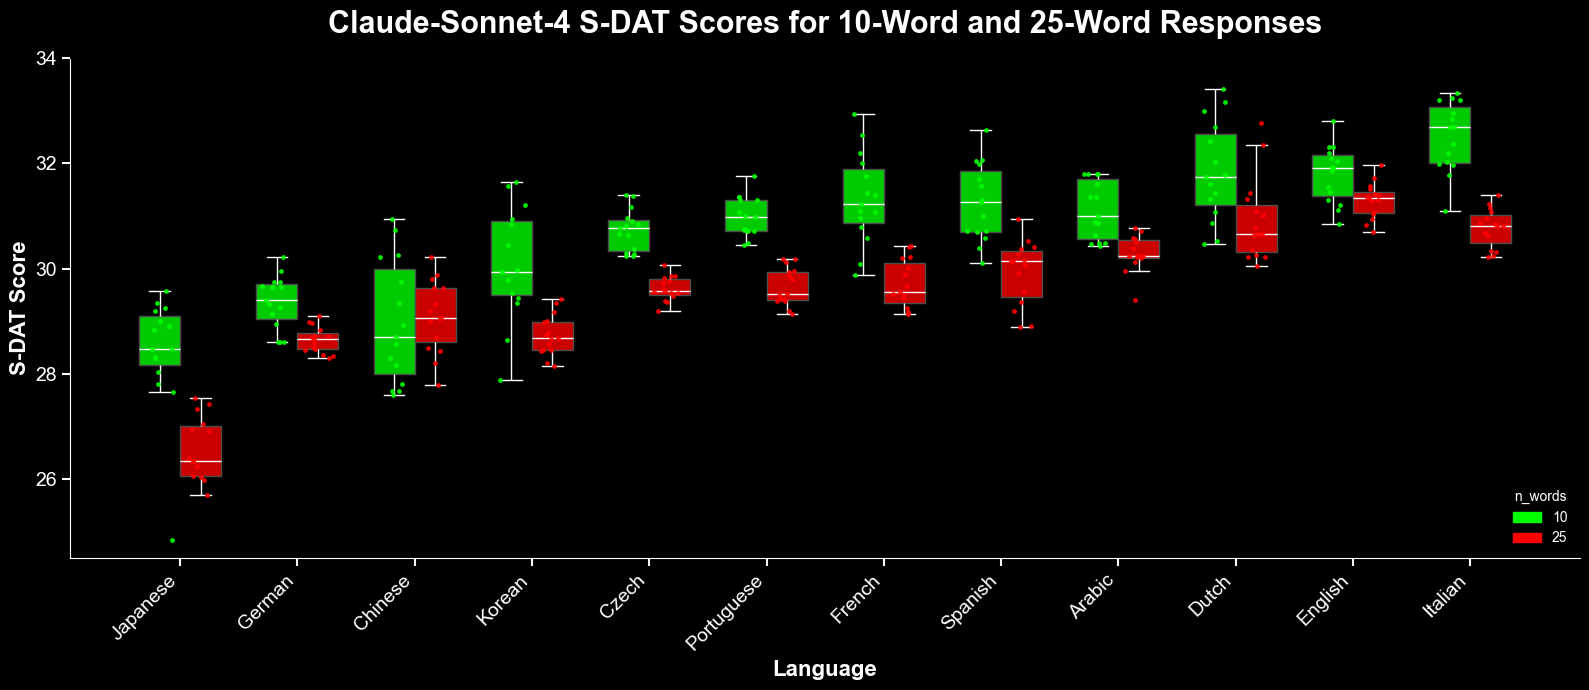

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

model_name_plot = "claude-sonnet-4-20250514"

# Filter only claude/claude-sonnet-4-20250514 and n_words=10 & 25
sub_df = df[
    (df["model"] == model_name_plot)
    & (df["n_words"].isin([10, 25]))
].copy()

# Order languages from lowest mean score to highest
order = (
    sub_df.groupby("language")["score"]
    .mean()
    .sort_values()
    .index
    .tolist()
)

# ---------------- Dark mode styling ----------------
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# Semi-transparent boxes
pal = {10: (0/255, 255/255, 0/255, 0.8),  # green
       25: (255/255, 0/255, 0/255, 0.8)}  # red
# Bright scatter colors
point_pal = {10: "#00FF00", 25: "#FF0000"}

fig, ax = plt.subplots(figsize=(16, 7))

# Boxplot
sns.boxplot(
    data=sub_df, x="language", y="score", hue="n_words",
    order=order, palette=pal, fliersize=0, width=0.7,
    saturation=1, ax=ax
)

# Make median & whiskers white
for artist in ax.artists:
    artist.set_edgecolor('white')
for line in ax.lines:
    line.set_color('white')

# ==== Scatter points manually ====
n_hue = 2
group_width = 0.7
inner_gap = group_width / n_hue
offsets = [-inner_gap/2, inner_gap/2]

for i, lang in enumerate(order):
    for j, n_words_val in enumerate([10, 25]):
        sub = sub_df[(sub_df["language"] == lang) & (sub_df["n_words"] == n_words_val)]
        x_positions = np.random.normal(loc=i + offsets[j], scale=0.05, size=len(sub))
        ax.scatter(
            x_positions,
            sub["score"],
            color=point_pal[n_words_val],
            alpha=0.9,
            s=12,
            linewidths=0,
            zorder=10
        )

# Labels, title, ticks
ax.set_xlabel("Language", color=fg_color, fontsize=16, fontweight='bold')
ax.set_ylabel("S-DAT Score", color=fg_color, fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)
ax.set_title(
    "Claude-Sonnet-4 S-DAT Scores for 10-Word and 25-Word Responses",
    color=fg_color, fontweight="bold", fontsize=22, pad=18
)

# Thicker spines
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1

ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

# Legend bottom-right inside the plot
handles = [Patch(facecolor=point_pal[k], edgecolor=point_pal[k], label=str(k)) for k in [10, 25]]
leg = ax.legend(
    handles=handles, title="n_words", loc="lower right",
    frameon=False
)
leg.get_title().set_color(fg_color)
for t in leg.get_texts():
    t.set_color(fg_color)
    
plt.ylim(24.5, 34)

plt.tight_layout()

plt.savefig("./results/plots/SDAT_1.1_claude-sonnet-4-languages.png",
                dpi=300,
                facecolor=plt.gcf().get_facecolor())

plt.show()


Plot SDAT with creative constraints

In [147]:
records = []
with open("results/SDAT_1.3_onlyGoogle_eatable_constrained_results.json", "r") as f:
    raw = json.load(f)

for entry in raw:
    config_dict = entry["config"]
    for model_name, values in entry.items():
        if model_name == "config":
            continue
        for conf_l, val_list in values.items():
            for val in val_list:
                records.append((model_name.split("/")[1], conf_l, config_dict['language'], 10, 'edible', val))

with open("results/SDAT_1.3_onlyGoogle_money_constrained_results.json", "r") as f:
    raw = json.load(f)

for entry in raw:
    config_dict = entry["config"]
    for model_name, values in entry.items():
        if model_name == "config":
            continue
        for conf_l, val_list in values.items():
            for val in val_list:
                records.append((model_name.split("/")[1], conf_l, config_dict['language'], 10, 'money', val))

with open("results/SDAT_1.3_onlyGoogle_sound_constrained_results.json", "r") as f:
    raw = json.load(f)

for entry in raw:
    config_dict = entry["config"]
    for model_name, values in entry.items():
        if model_name == "config":
            continue
        for conf_l, val_list in values.items():
            for val in val_list:
                records.append((model_name.split("/")[1], conf_l, config_dict['language'], 10, 'sound', val))

with open("results/SDAT_1.3_onlyGoogle_tools_constrained_results.json", "r") as f:
    raw = json.load(f)

for entry in raw:
    config_dict = entry["config"]
    for model_name, values in entry.items():
        if model_name == "config":
            continue
        for conf_l, val_list in values.items():
            for val in val_list:
                records.append((model_name.split("/")[1], conf_l, config_dict['language'], 10, 'tools', val))

df = pd.DataFrame(records, columns=['model', 'config', 'language', 'n_words', 'constraint', 'score'])

# 3) Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values(ascending=ascending)
    .index
    .tolist()
)

df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)
df

,model,config,language,n_words,constraint,score
0,gemini-2.5-flash,"{""temperature"": 1}",English,10,edible,25.658484
1,gemini-2.5-flash,"{""temperature"": 1}",English,10,edible,26.785192
2,gemini-2.5-flash,"{""temperature"": 1}",English,10,edible,25.410397
3,gemini-2.5-flash,"{""temperature"": 1}",English,10,edible,26.681867
4,gemini-2.5-flash,"{""temperature"": 1}",English,10,edible,27.070629
...,...,...,...,...,...,...
3573,gemma3n:e4b,"{""temperature"": 1}",Czech,10,tools,28.488149
3574,gemma3n:e4b,"{""temperature"": 1}",Czech,10,tools,28.196738
3575,gemma3n:e4b,"{""temperature"": 1}",Czech,10,tools,27.704580
3576,gemma3n:e4b,"{""temperature"": 1}",Czech,10,tools,27.902701


/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_36512/3697151090.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub.groupby("model")["score"]
/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_36512/3697151090.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)


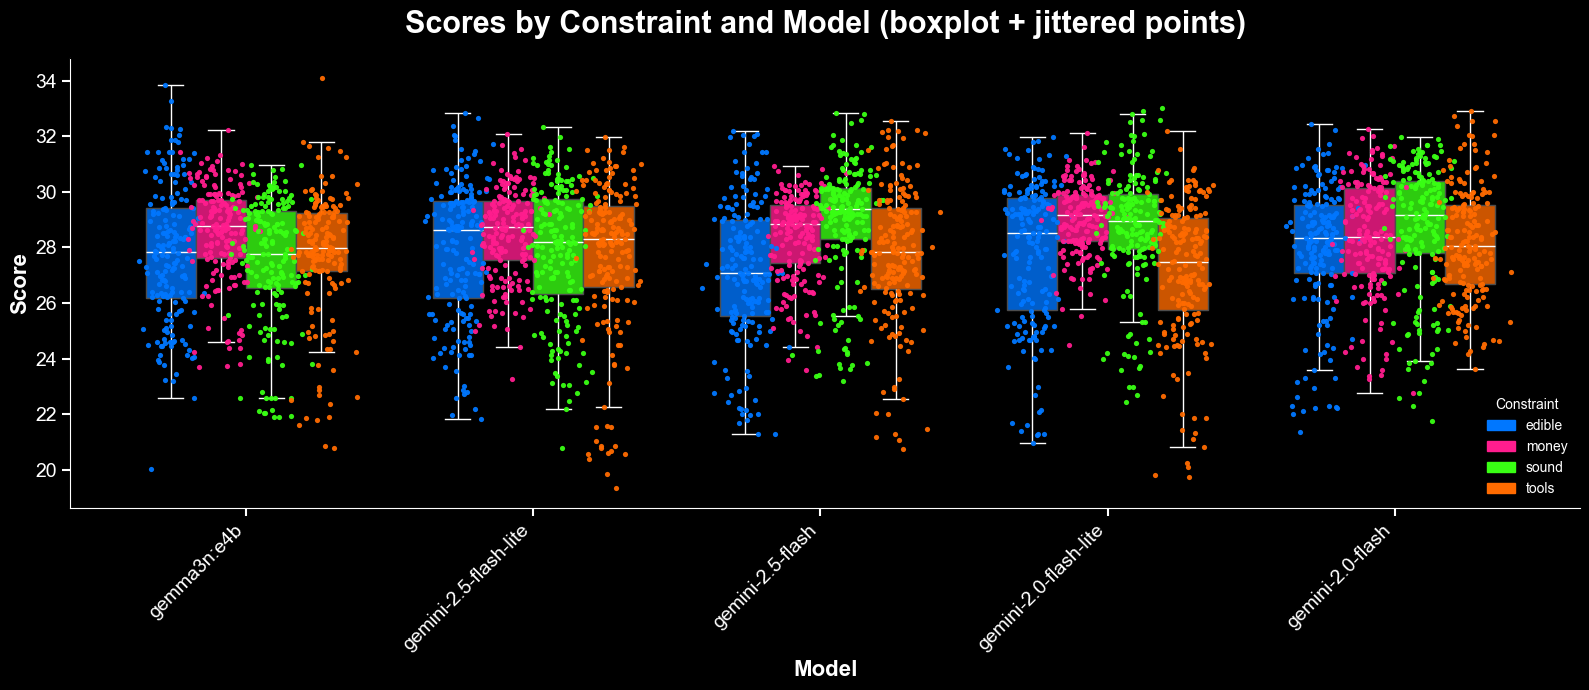

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# --- your real dataframe ---
# df = pd.read_csv(...)

# Keep only the four constraints (and whatever rows you want)
constraint_order = ["edible", "money", "sound", "tools"]
sub = df[df["constraint"].isin(constraint_order)].copy()

# Order models from lowest overall mean to highest (optional, looks nice)
order_models = (
    sub.groupby("model")["score"]
    .mean()
    .sort_values()
    .index
    .tolist()
)

# ------------- Dark mode styling -------------
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# Semi-transparent box colors (so points stand out)
box_pal = {
    "edible": (0/255, 119/255, 255/255, 0.8),  # cyan-ish
    "money":   (255/255, 29/255, 142/255, 0.8),# pink
    "sound":   (57/255, 255/255, 20/255, 0.8),    # green
    "tools":   (255/255, 107/255, 0/255, 0.8),    # red
}
# Bright point colors (opaque)
point_pal = {
    "edible": "#0077FF",
    "money":   "#FF1D8E",
    "sound":   "#39FF14",
    "tools":   "#FF6B00",
}

fig, ax = plt.subplots(figsize=(16, 7))

# --- Boxplots ---
sns.boxplot(
    data=sub, x="model", y="score", hue="constraint",
    order=order_models, hue_order=constraint_order,
    palette=box_pal, width=0.7, fliersize=0, saturation=1, ax=ax
)

# Make medians & whiskers/caps white for visibility
for artist in ax.artists:
    artist.set_edgecolor('white')
for line in ax.lines:
    line.set_color('white')

# --- Manually center jittered points for perfect alignment ---
n_hue = len(constraint_order)
group_width = 0.7
inner_gap = group_width / n_hue
offsets = [(-group_width/2 + inner_gap/2) + k*inner_gap for k in range(n_hue)]

for i, mdl in enumerate(order_models):
    for j, cons in enumerate(constraint_order):
        pts = sub[(sub["model"] == mdl) & (sub["constraint"] == cons)]
        if pts.empty:
            continue
        x_positions = np.random.normal(loc=i + offsets[j], scale=0.05, size=len(pts))
        ax.scatter(
            x_positions, pts["score"],
            s=14, alpha=0.95, color=point_pal[cons], linewidths=0, zorder=10
        )

# --- Labels, title, axes ---
ax.set_xlabel("Model", color=fg_color, fontsize=16, fontweight='bold')
ax.set_ylabel("Score", color=fg_color, fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)
ax.set_title(
    "Scores by Constraint and Model (boxplot + jittered points)",
    color=fg_color, fontweight="bold", fontsize=22, pad=18
)

# Thicker spines
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1

ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

# --- Clean legend, bottom-right inside the plot ---
handles = [Patch(facecolor=point_pal[c], edgecolor=point_pal[c], label=c) for c in constraint_order]
if ax.get_legend() is not None:
    ax.get_legend().remove()
leg = ax.legend(handles=handles, title="Constraint", loc="lower right", frameon=False)
leg.get_title().set_color(fg_color)
for t in leg.get_texts():
    t.set_color(fg_color)

plt.tight_layout()
plt.savefig("./results/plots/SDAT_1.2_constraints.png",
                dpi=300,
                facecolor=plt.gcf().get_facecolor())

plt.show()


## DSI

In [41]:
records = []
with open("results/DSI_1.3_prompt_effect_results.json", "r") as f:
    raw = json.load(f)

for entry, vals in raw.items():
    model_name = entry.split("_")[0]
    results = vals["results"]
    config_val = vals["config"]
    config_temperature = config_val["temperature"]
    
    for val in results:
        records.append((model_name, config_temperature, val*100))

with open("results/DSI_1.4_claude_openai_results.json", "r") as f:
    raw = json.load(f)

for entry, vals in raw.items():
    model_name = entry.split("_")[0]
    results = vals["results"]
    config_val = vals["config"]
    config_temperature = config_val["temperature"]
    
    for val in results:
        records.append((model_name, config_temperature, val*100))

df = pd.DataFrame(records, columns=['model', 'temperature', 'score'])

# 3) Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values(ascending=ascending)
    .index
    .tolist()
)

df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)
df

,model,temperature,score
0,gemini-2.5-flash,1,83.137900
1,gemini-2.5-flash,1,81.571966
2,gemini-2.5-flash,1,81.578958
3,gemini-2.5-flash,1,82.538098
4,gemini-2.5-flash,1,83.153647
...,...,...,...
427,gpt-5,1,81.289804
428,gpt-5,1,83.120811
429,gpt-5,1,82.486022
430,gpt-5,1,82.691175


/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_47895/1352204674.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)


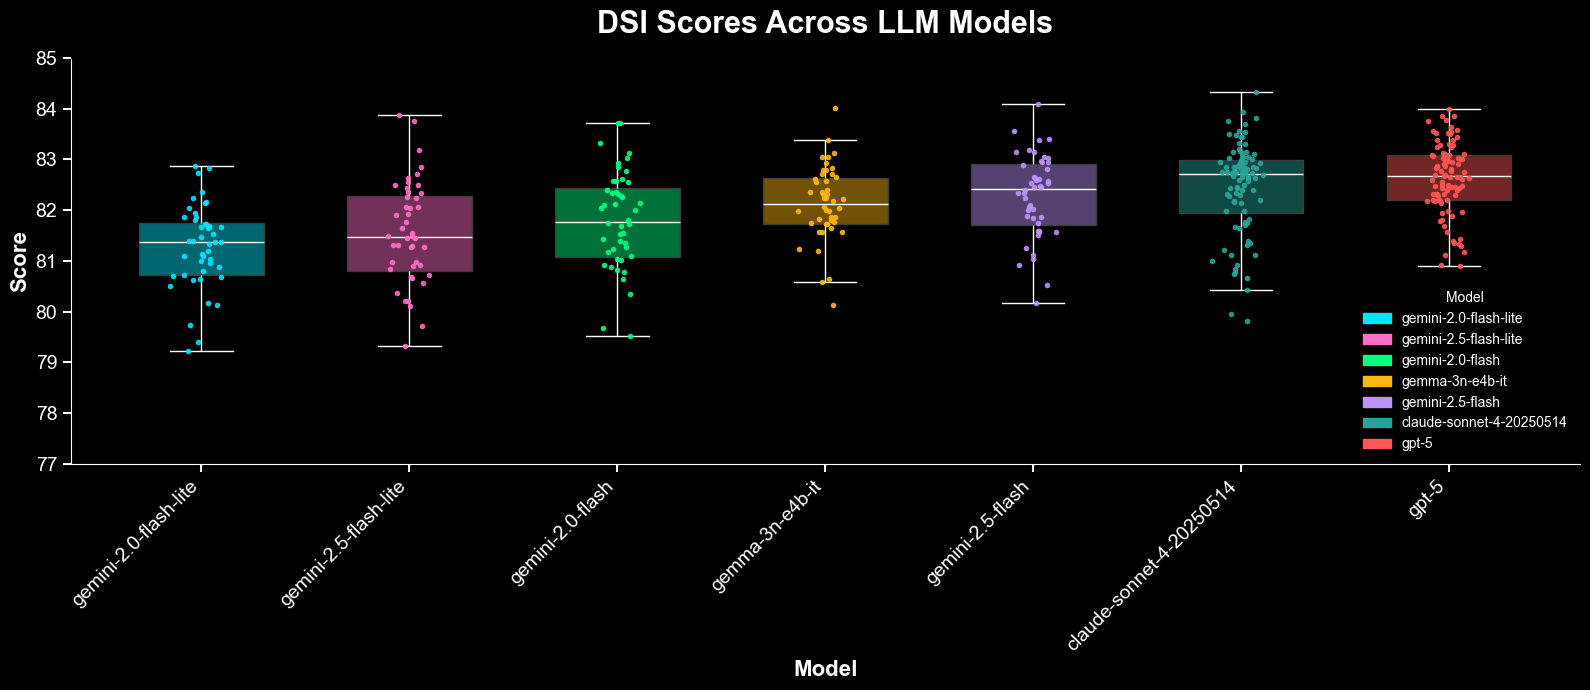

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# df already built as in your snippet

# Order models by mean (low → high)
order = (
    df.groupby("model", observed=False)["score"]
      .mean()
      .sort_values()
      .index
      .tolist()
)
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)

# -------- Dark mode style --------
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# -------- Per-model colors --------
# Vibrant defaults (cycled if you have many models)
vibrant_defaults = [
    "#00E5FF", "#FF6EC7", "#00FF7F", "#FDB813",
    "#BD93F9", "#26A69A", "#FF5555", "#3B82F6",
    "#FF9F1C", "#2ECC71",
]
default_map = {m: vibrant_defaults[i % len(vibrant_defaults)] for i, m in enumerate(order)}

# 👉 Edit any colors you want here (keys must match model names)
custom_colors = {
    # "gpt-5": "#FFD400",
    # "gemini-2.5-flash": "#00FF7F",
    # "claude-sonnet-4-20250514": "#FF6EC7",
}

# Final color map (custom overrides default)
model_colors = {m: custom_colors.get(m, default_map[m]) for m in order}

# Slight transparency for boxes so points pop
box_palette = {m: (*plt.matplotlib.colors.to_rgb(model_colors[m]), 0.45) for m in order}

fig, ax = plt.subplots(figsize=(16, 7))

# ---- Boxplot (colored per model) ----
sns.boxplot(
    data=df, x="model", y="score",
    order=order,
    hue="model", hue_order=order,  # color by model
    palette=box_palette,
    dodge=False, fliersize=0, width=0.6, saturation=1,
    ax=ax
)

# Make medians/whiskers/caps white for contrast
for artist in ax.artists:
    artist.set_edgecolor("white")
for line in ax.lines:  # whiskers, caps, medians
    line.set_color("white")

# ---- Jittered points (exactly centered per box) ----
jitter_sd = 0.05  # tighten if needed (e.g., 0.035)
for i, mdl in enumerate(order):
    sub = df[df["model"] == mdl]
    xs = np.random.normal(loc=i, scale=jitter_sd, size=len(sub))
    ax.scatter(
        xs, sub["score"],
        s=16, alpha=0.9,
        color=model_colors[mdl],
        linewidths=0, zorder=10
    )

# ---- Labels & styling ----
ax.set_xlabel("Model", color=fg_color, fontsize=16, fontweight="bold")
ax.set_ylabel("Score", color=fg_color, fontsize=16, fontweight="bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)
ax.set_title("DSI Scores Across LLM Models",
             color=fg_color, fontweight="bold", fontsize=22, pad=18)

# Thicker spines
i = 0
for spine in ax.spines.values():
    if i == 0:
        spine.set_color(fg_color)
    if i == 2:
        spine.set_color(fg_color)
    i += 1

ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

plt.ylim(77, 85)

# ---- Legend (bottom-right inside) ----
handles = [Patch(facecolor=model_colors[m], edgecolor=model_colors[m], label=m) for m in order]
if ax.get_legend() is not None:
    ax.get_legend().remove()
leg = ax.legend(handles=handles, title="Model", loc="lower right", frameon=False)
leg.get_title().set_color(fg_color)
for t in leg.get_texts():
    t.set_color(fg_color)

plt.tight_layout()

# plt.savefig("./results/plots/DSI_1.0_all_models.png",
#                 dpi=300,
#                 facecolor=plt.gcf().get_facecolor())


plt.show()


/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_36512/3010080729.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)
/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_36512/3010080729.py:89: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


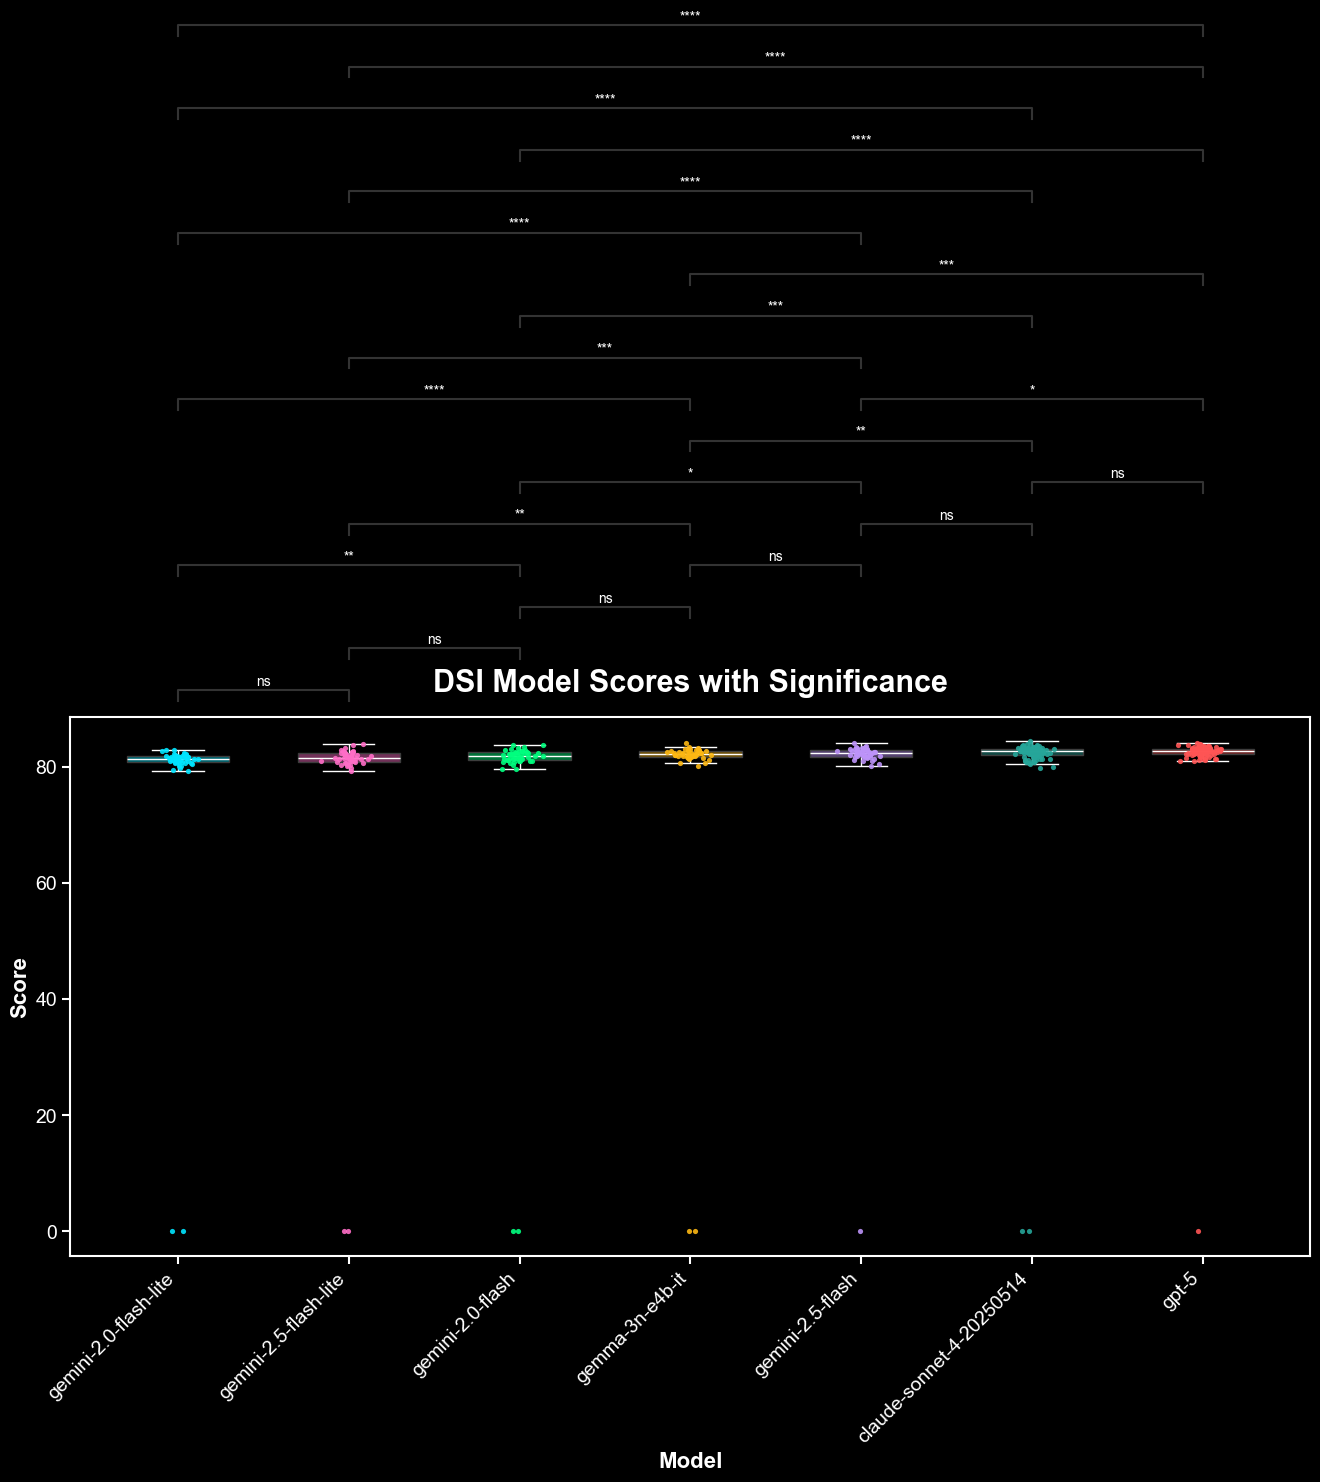

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannotations.Annotator import Annotator

# ---- your dataframe df ----
# df = pd.DataFrame(...)

# Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values()
    .index
    .tolist()
)
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)

# ---- Dark mode style ----
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# ---- Model colors dictionary (edit here) ----
model_colors = {
    m: c for m, c in zip(order,
        ["#00E5FF", "#FF6EC7", "#00FF7F", "#FDB813",
         "#BD93F9", "#26A69A", "#FF5555", "#3B82F6",
         "#FF9F1C", "#2ECC71"])
}

# Slight transparency for boxes
box_palette = {m: (*plt.matplotlib.colors.to_rgb(model_colors[m]), 0.45) for m in order}

fig, ax = plt.subplots(figsize=(16, 7))

# ---- Boxplot ----
sns.boxplot(
    data=df, x="model", y="score",
    order=order,
    hue="model", hue_order=order,  # color by model
    palette=box_palette,
    dodge=False, fliersize=0, width=0.6, saturation=1,
    ax=ax
)

# White medians/whiskers
for artist in ax.artists:
    artist.set_edgecolor("white")
for line in ax.lines:
    line.set_color("white")

# Jittered points overlay
jitter_sd = 0.05
for i, mdl in enumerate(order):
    sub = df[df["model"] == mdl]
    xs = np.random.normal(loc=i, scale=jitter_sd, size=len(sub))
    ax.scatter(xs, sub["score"], s=14, alpha=0.9,
               color=model_colors[mdl], linewidths=0, zorder=10)

# ---- Labels & styling ----
ax.set_xlabel("Model", color=fg_color, fontsize=16, fontweight='bold')
ax.set_ylabel("Score", color=fg_color, fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", color=fg_color)
ax.set_title("DSI Model Scores with Significance",
             color=fg_color, fontweight="bold", fontsize=22, pad=18)
for spine in ax.spines.values():
    spine.set_color(fg_color)
    spine.set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1.5, colors=fg_color)

# ---- Significance stars using statannotations ----
# Create pairwise combinations of models
pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i+1, len(order))]
annotator = Annotator(ax, pairs, data=df, x="model", y="score", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=0)
annotator.apply_and_annotate()

plt.tight_layout()
plt.show()


Temperature and thinking budget

In [183]:
records = []
with open("results/DSI_1.1_temperature_effect_results.json", "r") as f:
    raw = json.load(f)

for entry, vals in raw.items():
    model_name = entry.split("_")[0]
    results = vals["results"]
    config_val = vals["config"]
    config_temperature = config_val["temperature"]
    
    for val in results:
        records.append((model_name, config_temperature, val*100))

df = pd.DataFrame(records, columns=['model', 'temperature', 'score'])

# 3) Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values(ascending=ascending)
    .index
    .tolist()
)

df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)
df

,model,temperature,score
0,gemini-2.5-flash-lite,0.5,82.446337
1,gemini-2.5-flash-lite,0.5,81.510717
2,gemini-2.5-flash-lite,0.5,81.750184
3,gemini-2.5-flash-lite,0.5,81.431788
4,gemini-2.5-flash-lite,0.5,82.009172
...,...,...,...
435,gemini-2.5-flash-lite,2.0,82.976538
436,gemini-2.5-flash-lite,2.0,82.027370
437,gemini-2.5-flash-lite,2.0,84.057927
438,gemini-2.5-flash-lite,2.0,82.484949


In [184]:
corr_value = df['score'].corr(df['temperature'])
print(f"Correlation between score and temperature: {corr_value:.3f}")

Correlation between score and temperature: 0.028


In [185]:
records = []
with open("results/DSI_1.2_thinking_budget_results.json", "r") as f:
    raw = json.load(f)

for entry, vals in raw.items():
    model_name = entry.split("_")[0]
    results = vals["results"]
    config_val = vals["config"]
    config_temperature = config_val["temperature"]
    config_thinking_budget = config_val["thinking_budget"]
    
    for val in results:
        records.append((model_name, config_temperature, config_thinking_budget, val*100))

df = pd.DataFrame(records, columns=['model', 'temperature', "thinking_budget", 'score'])

# 3) Order models by mean
order = (
    df.groupby("model", observed=False)["score"]
    .mean()
    .sort_values(ascending=ascending)
    .index
    .tolist()
)

df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)
df

,model,temperature,thinking_budget,score
0,gemini-2.5-flash-lite,1,20,82.684231
1,gemini-2.5-flash-lite,1,20,81.972647
2,gemini-2.5-flash-lite,1,20,82.605332
3,gemini-2.5-flash-lite,1,20,82.156307
4,gemini-2.5-flash-lite,1,20,82.803339
...,...,...,...,...
435,gemini-2.5-flash-lite,1,4500,82.161635
436,gemini-2.5-flash-lite,1,4500,83.097768
437,gemini-2.5-flash-lite,1,4500,82.996500
438,gemini-2.5-flash-lite,1,4500,82.339966


In [186]:
corr_value = df['score'].corr(df['thinking_budget'])
print(f"Correlation between score and temperature: {corr_value:.3f}")

Correlation between score and temperature: 0.024
